# Traffy Fondue Data Analysis

In this project, we are going to analyse the data from an online platform called 'Traffy Fondue' (ทราฟฟี่ฟองดูว์ / ท่านพี่ฟ้องดู), developed by the National Electronics and Computer Technology Center (NECTEC) of Thailand. This platform allows residents in Thailand to report (and follow) issues such as dangerous pedestrian paths, corruption, broken public electrical appliances, etc in real time. For more information, please refer to https://www.traffy.in.th/.

![traffy_fondue_logo](https://www.nectec.or.th/sectionImage/5995)

### How to run the code

This is an executable [*Jupyter notebook*](https://jupyter.org) hosted on [Jovian.ml](https://www.jovian.ml), a platform for sharing data science projects. You can run and experiment with the code in a couple of ways: *using free online resources* (recommended) or *on your own computer*.

#### Option 1: Running using free online resources (1-click, recommended)

The easiest way to start executing this notebook is to click the "Run" button at the top of this page, and select "Run on Binder". This will run the notebook on [mybinder.org](https://mybinder.org), a free online service for running Jupyter notebooks. You can also select "Run on Colab" or "Run on Kaggle".


#### Option 2: Running on your computer locally

1. Install Conda by [following these instructions](https://conda.io/projects/conda/en/latest/user-guide/install/index.html). Add Conda binaries to your system `PATH`, so you can use the `conda` command on your terminal.

2. Create a Conda environment and install the required libraries by running these commands on the terminal:

```
conda create -n zerotopandas -y python=3.8 
conda activate zerotopandas
pip install jovian jupyter numpy pandas matplotlib seaborn opendatasets --upgrade
```

3. Press the "Clone" button above to copy the command for downloading the notebook, and run it on the terminal. This will create a new directory and download the notebook. The command will look something like this:

```
jovian clone notebook-owner/notebook-id
```



4. Enter the newly created directory using `cd directory-name` and start the Jupyter notebook.

```
jupyter notebook
```

You can now access Jupyter's web interface by clicking the link that shows up on the terminal or by visiting http://localhost:8888 on your browser. Click on the notebook file (it has a `.ipynb` extension) to open it.


## Downloading the Dataset

The dataset is available in both csv and json formats on https://share.traffy.in.th/teamchadchart. For simplicity, we are going to work on the csv format in this project.

There are two main ways to download the csv data file
- Go to https://share.traffy.in.th/teamchadchart, scroll down the left tab to the "Open data" label, then presses "csv"
- Go to https://publicapi.traffy.in.th/share/teamchadchart/download (which automatically downloads upon click)

Please note that the data that we are using in this project are up to **14.50 UTC on 12th August 2022**.

Once we download the data file, we move/upload it to our current working directory. Since the data is too large to commit to Jovian, we need to make sure that we have the csv file in the directory, alongside this Jupyter notebook.

## Data Preparation and Cleaning

In this step, we are going to prepare our data before analysing it.



Firstly, we import necessary modules

In [1]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.font_manager

We then read the csv dataset as a dataframe using Pandas.

In [2]:
raw_data_df = pd.read_csv('traffy_fondue_data.csv')

In [3]:
raw_data_df.head(5)

,ticket_id,type,organization,comment,coords,photo,address,district,subdistrict,province,timestamp,state
0,2022-CR797M,NaN,กรุงเทพมหานคร,มีแก๊งมอเตอร์ไซซิ่ง มาตั้งแก๊งรอบเสาชิงช้า รบก...,"100.50131,13.75256",https://storage.googleapis.com/traffy_public_b...,เสาชิงช้า แขวง เสาชิงช้า เขตพระนคร กรุงเทพมหาน...,พระนคร,เสาชิงช้า,กรุงเทพมหานคร,2022-08-12 14:47:41.69802+00,รอรับเรื่อง
1,2022-6QGB8R,NaN,กรุงเทพมหานคร,น้ำท่วมขัง ถนนชำรุด,"100.49539,13.59977",https://storage.googleapis.com/traffy_public_b...,310/44 ซอย เกรียงศักดิ์ อนุสรณ์ แขวง ทุ่งครุ เ...,ทุ่งครุ,ทุ่งครุ,กรุงเทพมหานคร,2022-08-12 14:45:51.129286+00,รอรับเรื่อง
2,2022-KNHGB3,NaN,กรุงเทพมหานคร,เกิดอุบัติเหตุแบลิเออร์ข้างทางที่มีการซ่อมท่อร...,"100.59597,13.72345",https://storage.googleapis.com/traffy_public_b...,440 ถ. สุขุมวิท 71 แขวง พระโขนงเหนือ เขตวัฒนา ...,วัฒนา,พระโขนงเหนือ,กรุงเทพมหานคร,2022-08-12 14:42:07.060547+00,รอรับเรื่อง
3,2022-6A732F,NaN,กรุงเทพมหานคร,มีร้านกาแฟมาเปิดในซอยโสภณ 2 (สุขุมวิท 68) แต่ใ...,"100.60143,13.67807",https://storage.googleapis.com/traffy_public_b...,418 Sukhumvit 68 Alley แขวง บางนา เขตบางนา กรุ...,บางนา,บางนาเหนือ,กรุงเทพมหานคร,2022-08-12 14:41:31.519491+00,รอรับเรื่อง
4,2022-HEDYNT,NaN,กรุงเทพมหานคร,ไฟมืดหน้าธนาคาร อันตรายมากช่วงกลางคืน,"100.50122,13.63766",https://storage.googleapis.com/traffy_public_b...,820/60 ถ. ประชาอุทิศ แขวง ทุ่งครุ เขตทุ่งครุ ก...,ทุ่งครุ,ทุ่งครุ,กรุงเทพมหานคร,2022-08-12 14:40:51.838659+00,รอรับเรื่อง


We realise from the sample data above that some data are in Thai, which cannot be displayed during the analysis that we are going to do in the next section. To resolve this issue, we need to download and add the Thai font to our system.

We can download the Thai font simply by clicking at this link: https://github.com/Phonbopit/sarabun-webfont/raw/master/fonts/thsarabunnew-webfont.ttf. Once the font file is downloaded, move it to the current directory.

Then we add it to the matplotlib font manager. Note that matplotlib is a module used for data visualisation.

In [4]:
# from "https://medium.com/@splendid_lapis_salmon_75/วิเคราะห์ข้อมูลปัญหาภายในกรุงเทพแบบชัชชัช-traffy-f7e82b09ffa2"
mpl.font_manager.fontManager.addfont('thsarabunnew-webfont.ttf')
mpl.rc('font', family='TH Sarabun New')

Now that we have included the Thai font into matplotlib, let's start by taking a look at the data.

In [5]:
raw_data_df.shape

(118552, 12)

In [6]:
raw_data_df.head(5)

,ticket_id,type,organization,comment,coords,photo,address,district,subdistrict,province,timestamp,state
0,2022-CR797M,NaN,กรุงเทพมหานคร,มีแก๊งมอเตอร์ไซซิ่ง มาตั้งแก๊งรอบเสาชิงช้า รบก...,"100.50131,13.75256",https://storage.googleapis.com/traffy_public_b...,เสาชิงช้า แขวง เสาชิงช้า เขตพระนคร กรุงเทพมหาน...,พระนคร,เสาชิงช้า,กรุงเทพมหานคร,2022-08-12 14:47:41.69802+00,รอรับเรื่อง
1,2022-6QGB8R,NaN,กรุงเทพมหานคร,น้ำท่วมขัง ถนนชำรุด,"100.49539,13.59977",https://storage.googleapis.com/traffy_public_b...,310/44 ซอย เกรียงศักดิ์ อนุสรณ์ แขวง ทุ่งครุ เ...,ทุ่งครุ,ทุ่งครุ,กรุงเทพมหานคร,2022-08-12 14:45:51.129286+00,รอรับเรื่อง
2,2022-KNHGB3,NaN,กรุงเทพมหานคร,เกิดอุบัติเหตุแบลิเออร์ข้างทางที่มีการซ่อมท่อร...,"100.59597,13.72345",https://storage.googleapis.com/traffy_public_b...,440 ถ. สุขุมวิท 71 แขวง พระโขนงเหนือ เขตวัฒนา ...,วัฒนา,พระโขนงเหนือ,กรุงเทพมหานคร,2022-08-12 14:42:07.060547+00,รอรับเรื่อง
3,2022-6A732F,NaN,กรุงเทพมหานคร,มีร้านกาแฟมาเปิดในซอยโสภณ 2 (สุขุมวิท 68) แต่ใ...,"100.60143,13.67807",https://storage.googleapis.com/traffy_public_b...,418 Sukhumvit 68 Alley แขวง บางนา เขตบางนา กรุ...,บางนา,บางนาเหนือ,กรุงเทพมหานคร,2022-08-12 14:41:31.519491+00,รอรับเรื่อง
4,2022-HEDYNT,NaN,กรุงเทพมหานคร,ไฟมืดหน้าธนาคาร อันตรายมากช่วงกลางคืน,"100.50122,13.63766",https://storage.googleapis.com/traffy_public_b...,820/60 ถ. ประชาอุทิศ แขวง ทุ่งครุ เขตทุ่งครุ ก...,ทุ่งครุ,ทุ่งครุ,กรุงเทพมหานคร,2022-08-12 14:40:51.838659+00,รอรับเรื่อง


In [7]:
raw_data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 118552 entries, 0 to 118551
Data columns (total 12 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   ticket_id     118514 non-null  object
 1   type          66200 non-null   object
 2   organization  118514 non-null  object
 3   comment       118362 non-null  object
 4   coords        118552 non-null  object
 5   photo         118552 non-null  object
 6   address       118514 non-null  object
 7   district      117924 non-null  object
 8   subdistrict   117926 non-null  object
 9   province      118506 non-null  object
 10  timestamp     118552 non-null  object
 11  state         118522 non-null  object
dtypes: object(12)
memory usage: 10.9+ MB


The data contains 118552 rows and 12 columns. The information for each column is as follows:
- **ticket_id:** unique index for each issue
- **type:** type of the reported issue e.g. pedestrian path, electricity
- **organization:** the organisation accountable for this issue
- **comment:** a description for an issue
- **coords:** the latitude and the longitude of the issue whereabouts
- **photo:** the image of the incident (taken by the issue reporter)
- **address:** the address of the place an issue occurred
- **district:** the district of the place an issue occurred
- **subdistrict:** the subdistrict of the place an issue occurred
- **province:** the province of the place an issue occurred
- **timestamp:** the time this issue was reported
- **state:** the state of the issue e.g. resolved, in progress, not received (by the organisation yet)

Only the columns **coords**, **photo** and **timestamp** contain all non-null data. As a result, we need to handle null data in other columns apart from these 3 columns.

### 1st column: ticket_id

Each issue should have a unique id, so it seems unusual that some issues have no ids. Let's take a closer look at these issues.

In [8]:
raw_data_df[raw_data_df['ticket_id'].isna()]

,ticket_id,type,organization,comment,coords,photo,address,district,subdistrict,province,timestamp,state
2843,NaN,NaN,NaN,NaN,"100.56858,13.72421",https://storage.googleapis.com/traffy_public_b...,NaN,NaN,NaN,NaN,2022-08-09 07:44:24.267491+00,ส่งต่อ(ใหม่)
2851,NaN,NaN,NaN,NaN,"100.68975,13.85846",https://storage.googleapis.com/traffy_public_b...,NaN,NaN,NaN,NaN,2022-08-09 07:34:48.19422+00,กำลังดำเนินการ
3048,NaN,NaN,NaN,NaN,"100.47137,13.69390",https://storage.googleapis.com/traffy_public_b...,NaN,NaN,NaN,NaN,2022-08-09 03:53:58.453404+00,กำลังดำเนินการ
3429,NaN,NaN,NaN,NaN,"100.56922,13.79475",https://storage.googleapis.com/traffy_public_b...,NaN,NaN,NaN,NaN,2022-08-08 13:19:43.890082+00,กำลังดำเนินการ
3437,NaN,สะพาน,NaN,NaN,"100.47694,13.71429",https://storage.googleapis.com/traffy_public_b...,NaN,NaN,NaN,NaN,2022-08-08 13:11:45.818509+00,กำลังดำเนินการ
4088,NaN,NaN,NaN,NaN,"100.56568,13.84307",https://storage.googleapis.com/traffy_public_b...,NaN,NaN,NaN,NaN,2022-08-08 02:11:23.195672+00,กำลังดำเนินการ
5275,NaN,เสนอแนะ,NaN,NaN,"100.70932,13.80494",https://storage.googleapis.com/traffy_public_b...,NaN,NaN,NaN,NaN,2022-08-06 10:54:32.836594+00,เสร็จสิ้น
6121,NaN,เสนอแนะ,NaN,NaN,"100.70939,13.80525",https://storage.googleapis.com/traffy_public_b...,NaN,NaN,NaN,NaN,2022-08-05 11:42:51.610389+00,ส่งต่อ(ใหม่)
6310,NaN,NaN,NaN,NaN,"100.55391,13.77073",https://storage.googleapis.com/traffy_public_b...,NaN,NaN,NaN,NaN,2022-08-05 08:38:37.317744+00,เสร็จสิ้น
6731,NaN,NaN,NaN,NaN,"100.51362,13.60816",https://storage.googleapis.com/traffy_public_b...,NaN,NaN,NaN,NaN,2022-08-05 04:53:25.612846+00,เสร็จสิ้น


In [9]:
raw_data_df[raw_data_df['ticket_id'].isna()].photo.value_counts()

https://storage.googleapis.com/traffy_public_bucket/TeamChadChart/corruption_photo2.png    38
Name: photo, dtype: int64

These rows contains the same photo which only has a Thai text 'เรื่องทุจริต' (which means 'corruption'), so we may assume that these rows are included into the dataset for platform development purposes and can be safely removed.   

In [10]:
raw_data_df = raw_data_df.dropna(subset=['ticket_id'])

### 2nd column: type

In [11]:
raw_data_df[raw_data_df['type'].isna()]

,ticket_id,type,organization,comment,coords,photo,address,district,subdistrict,province,timestamp,state
0,2022-CR797M,NaN,กรุงเทพมหานคร,มีแก๊งมอเตอร์ไซซิ่ง มาตั้งแก๊งรอบเสาชิงช้า รบก...,"100.50131,13.75256",https://storage.googleapis.com/traffy_public_b...,เสาชิงช้า แขวง เสาชิงช้า เขตพระนคร กรุงเทพมหาน...,พระนคร,เสาชิงช้า,กรุงเทพมหานคร,2022-08-12 14:47:41.69802+00,รอรับเรื่อง
1,2022-6QGB8R,NaN,กรุงเทพมหานคร,น้ำท่วมขัง ถนนชำรุด,"100.49539,13.59977",https://storage.googleapis.com/traffy_public_b...,310/44 ซอย เกรียงศักดิ์ อนุสรณ์ แขวง ทุ่งครุ เ...,ทุ่งครุ,ทุ่งครุ,กรุงเทพมหานคร,2022-08-12 14:45:51.129286+00,รอรับเรื่อง
2,2022-KNHGB3,NaN,กรุงเทพมหานคร,เกิดอุบัติเหตุแบลิเออร์ข้างทางที่มีการซ่อมท่อร...,"100.59597,13.72345",https://storage.googleapis.com/traffy_public_b...,440 ถ. สุขุมวิท 71 แขวง พระโขนงเหนือ เขตวัฒนา ...,วัฒนา,พระโขนงเหนือ,กรุงเทพมหานคร,2022-08-12 14:42:07.060547+00,รอรับเรื่อง
3,2022-6A732F,NaN,กรุงเทพมหานคร,มีร้านกาแฟมาเปิดในซอยโสภณ 2 (สุขุมวิท 68) แต่ใ...,"100.60143,13.67807",https://storage.googleapis.com/traffy_public_b...,418 Sukhumvit 68 Alley แขวง บางนา เขตบางนา กรุ...,บางนา,บางนาเหนือ,กรุงเทพมหานคร,2022-08-12 14:41:31.519491+00,รอรับเรื่อง
4,2022-HEDYNT,NaN,กรุงเทพมหานคร,ไฟมืดหน้าธนาคาร อันตรายมากช่วงกลางคืน,"100.50122,13.63766",https://storage.googleapis.com/traffy_public_b...,820/60 ถ. ประชาอุทิศ แขวง ทุ่งครุ เขตทุ่งครุ ก...,ทุ่งครุ,ทุ่งครุ,กรุงเทพมหานคร,2022-08-12 14:40:51.838659+00,รอรับเรื่อง
...,...,...,...,...,...,...,...,...,...,...,...,...
118546,2021-GT33Y8,NaN,กรุงเทพมหานคร,NaN,"100.56047,13.81835",https://storage.googleapis.com/traffy_public_b...,หน้าหอวัง จตุจักร,จตุจักร,จตุจักร,กรุงเทพมหานคร,2021-09-01 09:33:37.92638+00,เสร็จสิ้น
118547,2021-4ZG4DK,NaN,เพื่อนชัชชาติ,NaN,"100.65415,13.81938",https://storage.googleapis.com/traffy_public_b...,เเยกนวมินทร ตัดเกษตรนวมินทร์,บึงกุ่ม,นวลจันทร์,กรุงเทพมหานคร,2021-09-01 09:33:36.223963+00,ส่งเรื่องแล้ว
118548,2021-GJWY3P,NaN,กรุงเทพมหานคร,NaN,"100.54204,13.71078",https://storage.googleapis.com/traffy_public_b...,ถนนเย็นอากาศ สาทร,ยานนาวา,ช่องนนทรี,กรุงเทพมหานคร,2021-09-01 09:33:34.304352+00,เสร็จสิ้น
118549,2021-66JJH8,NaN,กรุงเทพมหานคร,NaN,"100.55089,13.78865",https://storage.googleapis.com/traffy_public_b...,ถนนจันทน์ สาทร,พญาไท,สามเสนใน,กรุงเทพมหานคร,2021-09-01 09:33:32.434846+00,เสร็จสิ้น


There are so many rows with no types so we cannot simply drop all of them. Therefore, we should determine their types based on the comment value.

But let's look at all the rows that do not have any comment in it.

In [12]:
raw_data_df[(raw_data_df['type'].isna()) & (raw_data_df['comment'].isna())]

,ticket_id,type,organization,comment,coords,photo,address,district,subdistrict,province,timestamp,state
118365,2021-7NDUXZ,NaN,เพื่อนชัชชาติ,NaN,"100.56824,13.91961",https://storage.googleapis.com/traffy_public_b...,ปากซอยวัดเวฬุวนาราม17,ดอนเมือง,ดอนเมือง,กรุงเทพมหานคร,2021-09-01 09:42:18.419466+00,ส่งเรื่องแล้ว
118367,2021-7XA9BN,NaN,เพื่อนชัชชาติ,NaN,"100.57796,13.91856",https://storage.googleapis.com/traffy_public_b...,หมู่บ้านศิริสุข,ดอนเมือง,ดอนเมือง,กรุงเทพมหานคร,2021-09-01 09:42:14.140148+00,ส่งเรื่องแล้ว
118368,2021-77RAVE,NaN,เพื่อนชัชชาติ,NaN,"100.57809,13.91831",https://storage.googleapis.com/traffy_public_b...,เคหะดอนเมือง​ หมู่บ้านสิริสุข,ดอนเมือง,ดอนเมือง,กรุงเทพมหานคร,2021-09-01 09:42:11.993593+00,ส่งเรื่องแล้ว
118369,2021-BB43EK,NaN,เพื่อนชัชชาติ,NaN,"100.57961,13.91632",https://storage.googleapis.com/traffy_public_b...,ท้ายหมู่บ้านพิณฑุมาธานี ซอยช่างอากาศอุทิศ13,ดอนเมือง,ดอนเมือง,กรุงเทพมหานคร,2021-09-01 09:42:09.907769+00,ส่งเรื่องแล้ว
118370,2021-4YY6NB,NaN,เพื่อนชัชชาติ,NaN,"100.57961,13.91632",https://storage.googleapis.com/traffy_public_b...,ถนนช่างอากาศอุทิศ13-20,ดอนเมือง,ดอนเมือง,กรุงเทพมหานคร,2021-09-01 09:42:08.012332+00,ส่งเรื่องแล้ว
...,...,...,...,...,...,...,...,...,...,...,...,...
118546,2021-GT33Y8,NaN,กรุงเทพมหานคร,NaN,"100.56047,13.81835",https://storage.googleapis.com/traffy_public_b...,หน้าหอวัง จตุจักร,จตุจักร,จตุจักร,กรุงเทพมหานคร,2021-09-01 09:33:37.92638+00,เสร็จสิ้น
118547,2021-4ZG4DK,NaN,เพื่อนชัชชาติ,NaN,"100.65415,13.81938",https://storage.googleapis.com/traffy_public_b...,เเยกนวมินทร ตัดเกษตรนวมินทร์,บึงกุ่ม,นวลจันทร์,กรุงเทพมหานคร,2021-09-01 09:33:36.223963+00,ส่งเรื่องแล้ว
118548,2021-GJWY3P,NaN,กรุงเทพมหานคร,NaN,"100.54204,13.71078",https://storage.googleapis.com/traffy_public_b...,ถนนเย็นอากาศ สาทร,ยานนาวา,ช่องนนทรี,กรุงเทพมหานคร,2021-09-01 09:33:34.304352+00,เสร็จสิ้น
118549,2021-66JJH8,NaN,กรุงเทพมหานคร,NaN,"100.55089,13.78865",https://storage.googleapis.com/traffy_public_b...,ถนนจันทน์ สาทร,พญาไท,สามเสนใน,กรุงเทพมหานคร,2021-09-01 09:33:32.434846+00,เสร็จสิ้น


These rows mostly contain an irrelevant image, so we simply drop them from our dataset.

In [13]:
raw_data_df = raw_data_df.drop(raw_data_df[(raw_data_df['type'].isna()) & (raw_data_df['comment'].isna())].index)

In [14]:
raw_data_df.shape

(118362, 12)

Now we will determine a type for each issue based on its comment. There may be some rows with duplicate comments, in which case only a single row will be kept.

In [15]:
raw_data_df['comment'].duplicated().sum() # There are 19935 repeated rows (perhaps due to technical errors or repeated submission)

19935

In [16]:
raw_data_df = raw_data_df.drop_duplicates(subset=['comment'])

In [17]:
raw_data_df.shape # There are 98427 rows left after all the duplicates are removed

(98427, 12)

Let's consider each type of a problem.

In [18]:
types = raw_data_df['type']

In [19]:
types.value_counts()

ถนน                                          12127
น้ำท่วม                                       4318
แสงสว่าง                                      3585
ทางเท้า                                       3574
ความสะอาด                                     3052
                                             ...  
คลอง,ความสะอาด,ถนน,กีดขวาง                       1
แสงสว่าง,สะพาน,สายไฟ,ความปลอดภัย                 1
ท่อระบายน้ำ,แสงสว่าง,ถนน,ความปลอดภัย             1
สายไฟ,ความปลอดภัย,น้ำท่วม,ถนน,ท่อระบายน้ำ        1
คลอง,ความสะอาด,ถนน,ความปลอดภัย                   1
Name: type, Length: 1033, dtype: int64

There seems to be some rows which falls into multiple issue categories. We will first check those of one category.

In [20]:
all_types = types[types.notnull() & ~types.str.contains(',',na=False)].unique()

In [21]:
all_types

array(['ถนน', 'สัตว์จรจัด', 'แสงสว่าง', 'น้ำท่วม', 'ทางเท้า', 'กีดขวาง',
       'จราจร', 'สะพาน', 'ความสะอาด', 'ท่อระบายน้ำ', 'สายไฟ', 'คลอง',
       'เสนอแนะ', 'ความปลอดภัย', 'การเดินทาง'], dtype=object)

and then we will check if those rows with multiple categories introduce any new category.

In [22]:
mixed_types = types[types.notnull() & types.str.contains(',',na=False)].unique()

In [23]:
mixed_types

array(['ถนน,แสงสว่าง', 'ถนน,กีดขวาง,ความสะอาด,ทางเท้า', 'จราจร,เสนอแนะ',
       ..., 'ท่อระบายน้ำ,น้ำท่วม,ความสะอาด,ถนน', 'การเดินทาง,สะพาน',
       'การเดินทาง,ถนน,คลอง'], dtype=object)

In [24]:
arrs = ['ถนน', 'สัตว์จรจัด', 'แสงสว่าง', 'น้ำท่วม', 'ทางเท้า', 'กีดขวาง',
       'จราจร', 'สะพาน', 'ความสะอาด', 'ท่อระบายน้ำ', 'สายไฟ', 'คลอง',
       'เสนอแนะ', 'ความปลอดภัย', 'การเดินทาง']

def check_type(arrs, ts):
    for t in arrs:
        if t in ts:
            return True
    return False

all([check_type(arrs, ts) for ts in mixed_types]) # check if all mixed types are a combination of individual types seen so far

True

We now know that all the mixed-type rows do not introduce any new type of problems, so we have 15 types of problems:
- ถนน (road)
- สัตว์จรจัด (stray animals)
- แสงสว่าง (light)
- น้ำท่วม (flood)
- ทางเท้า (pedestrian path)
- กีดขวาง (obstacle)
- จราจร (traffic)
- สะพาน (bridge)
- ความสะอาด (cleanliness)
- ท่อระบายน้ำ (drain)
- สายไฟ (wires)
- คลอง (canals)
- เสนอแนะ (suggestions)
- ความปลอดภัย (safety)
- การเดินทาง (travel)

Since a row can fall into several problem categories, we are going to set up a problem ranking system. Each row is then assigned the most dominant problem type.

#### Ranking system

The ranking system for problem types is from highest to lowest as follows:

1. สัตว์จรจัด (stray animals)
2. น้ำท่วม (flood)
3. สายไฟ (wires)

4. แสงสว่าง (light)
5. ท่อระบายน้ำ (drain)
6. สะพาน (bridge)
7. กีดขวาง (obstacle)
8. ทางเท้า (pedestrian path)
9. คลอง (canals)
10. ถนน (road)
11. จราจร (traffic)

10. ความปลอดภัย (safety)
11. ความสะอาด (cleanliness)
12. การเดินทาง (travel)

13. เสนอแนะ (suggestions)

Please note that this system ranks according to how specific a problem type is, with the more specific the more dominant. It is therefore not perfect, and still requires more consideration.

#### Step 1: Calculate the most dominant problem type for each null-type row (based on comment)

In [25]:
# Dictionary of words representing each problem type (inspired by "https://medium.com/@splendid_lapis_salmon_75/วิเคราะห์ข้อมูลปัญหาภายในกรุงเทพแบบชัชชัช-traffy-f7e82b09ffa2")
problem_dict = {}
problem_dict['สัตว์จรจัด'] = ['แมว', 'สุนัข', 'สัตว์', 'จรจัด', 'หมา', 'นก']
problem_dict['น้ำท่วม'] = ['น้ำท่วม', 'ท่วม', 'ฝนตกหนัก', 'น้ำขัง']
problem_dict['สายไฟ'] = ['สายไฟ', 'สายสื่อสาร', 'สัญญาณ']
problem_dict['แสงสว่าง'] = ['มืด', 'ดับ', 'ไม่ติด', 'สว่าง']
problem_dict['ท่อระบายน้ำ'] = ['ท่อ', 'ระบายน้ำ', 'ตัน']
problem_dict['สะพาน'] = ['สะพาน']
problem_dict['กีดขวาง'] = ['ขวาง']
problem_dict['ทางเท้า'] = ['ทางเท้า', 'ฟุตบาท', 'ทางเดิน']
problem_dict['คลอง'] = ['คลอง', 'เน่า', 'เหม็น', 'วัชพืช']
problem_dict['ถนน'] = ['ถนน']
problem_dict['จราจร'] = ['รถติด', 'จราจร', 'ติด', 'รถชน', 'ขับ', 'ขี่']
problem_dict['ความปลอดภัย'] = ['ปลอดภัย', 'อันตราย']
problem_dict['ความสะอาด'] = ['ขยะ', 'สกปรก', 'สะอาด']
problem_dict['การเดินทาง'] = ['bus', 'ขนส่ง', 'เดินทาง', 'เดินเท้า', 'รถเมล์']
problem_dict['เสนอแนะ'] = ['แนะนำ', 'อยาก', 'เสนอ', 'ปรับปรุง']

def classify_problem_type(row):
    if pd.notnull(row['type']):
        return row
    # This requires the dictionary to be ordered
    for problem_type in problem_dict:
        for keyword in problem_dict[problem_type]:
            if keyword in row['comment']:
                row['type'] = problem_type
                return row
    return row

raw_data_df.apply(classify_problem_type, axis='columns')

,ticket_id,type,organization,comment,coords,photo,address,district,subdistrict,province,timestamp,state
0,2022-CR797M,NaN,กรุงเทพมหานคร,มีแก๊งมอเตอร์ไซซิ่ง มาตั้งแก๊งรอบเสาชิงช้า รบก...,"100.50131,13.75256",https://storage.googleapis.com/traffy_public_b...,เสาชิงช้า แขวง เสาชิงช้า เขตพระนคร กรุงเทพมหาน...,พระนคร,เสาชิงช้า,กรุงเทพมหานคร,2022-08-12 14:47:41.69802+00,รอรับเรื่อง
1,2022-6QGB8R,น้ำท่วม,กรุงเทพมหานคร,น้ำท่วมขัง ถนนชำรุด,"100.49539,13.59977",https://storage.googleapis.com/traffy_public_b...,310/44 ซอย เกรียงศักดิ์ อนุสรณ์ แขวง ทุ่งครุ เ...,ทุ่งครุ,ทุ่งครุ,กรุงเทพมหานคร,2022-08-12 14:45:51.129286+00,รอรับเรื่อง
2,2022-KNHGB3,ท่อระบายน้ำ,กรุงเทพมหานคร,เกิดอุบัติเหตุแบลิเออร์ข้างทางที่มีการซ่อมท่อร...,"100.59597,13.72345",https://storage.googleapis.com/traffy_public_b...,440 ถ. สุขุมวิท 71 แขวง พระโขนงเหนือ เขตวัฒนา ...,วัฒนา,พระโขนงเหนือ,กรุงเทพมหานคร,2022-08-12 14:42:07.060547+00,รอรับเรื่อง
3,2022-6A732F,สัตว์จรจัด,กรุงเทพมหานคร,มีร้านกาแฟมาเปิดในซอยโสภณ 2 (สุขุมวิท 68) แต่ใ...,"100.60143,13.67807",https://storage.googleapis.com/traffy_public_b...,418 Sukhumvit 68 Alley แขวง บางนา เขตบางนา กรุ...,บางนา,บางนาเหนือ,กรุงเทพมหานคร,2022-08-12 14:41:31.519491+00,รอรับเรื่อง
4,2022-HEDYNT,แสงสว่าง,กรุงเทพมหานคร,ไฟมืดหน้าธนาคาร อันตรายมากช่วงกลางคืน,"100.50122,13.63766",https://storage.googleapis.com/traffy_public_b...,820/60 ถ. ประชาอุทิศ แขวง ทุ่งครุ เขตทุ่งครุ ก...,ทุ่งครุ,ทุ่งครุ,กรุงเทพมหานคร,2022-08-12 14:40:51.838659+00,รอรับเรื่อง
...,...,...,...,...,...,...,...,...,...,...,...,...
118497,2021-GRFECB,ท่อระบายน้ำ,เพื่อนชัชชาติ,บางครั้งถ้าในตกหนัก 3-4 วันถึงจะลง เพราะท่อน้ำ...,"100.59174,13.73798",https://storage.googleapis.com/traffy_public_b...,เอกมัย 22 เลยกลางซอย แยกซ้ายที่ 2 ถึงสุดซอย วัฒนา,วัฒนา,คลองตันเหนือ,กรุงเทพมหานคร,2021-09-01 09:37:07.755755+00,ส่งเรื่องแล้ว
118498,2021-38QNA4,ท่อระบายน้ำ,เพื่อนชัชชาติ,ระบบท่อมีปัญหาไม่ระบาย น้ำปริ่มท่อตลอดเวลา,"100.60482,13.70610",https://storage.googleapis.com/traffy_public_b...,ซอยสุขุมวิท 81 วัฒนา,วัฒนา,พระโขนงเหนือ,กรุงเทพมหานคร,2021-09-01 09:37:05.427457+00,ส่งเรื่องแล้ว
118502,2021-9QUANT,สัตว์จรจัด,เพื่อนชัชชาติ,ท่วมทุกครั้งที่ตก บางทีข้ามวันกว่าจะลด ไม่เคยเ...,"100.60396,13.68972",https://storage.googleapis.com/traffy_public_b...,ซอยสุขุมวิท 64 แยก6-5-2 (พงษ์เวชอนุสรณ์ 2 ) พร...,พระโขนง,บางจาก,กรุงเทพมหานคร,2021-09-01 09:34:58.439472+00,ส่งเรื่องแล้ว
118515,2021-3RGZFW,น้ำท่วม,เพื่อนชัชชาติ,ไม่เคยท่วม แต่หลังๆ มาฝนตกนิดเดียวก็ท่วมง่าย,"100.55140,13.74557",https://storage.googleapis.com/traffy_public_b...,สุขุมวิทซอย 1 วัฒนา,วัฒนา,คลองเตยเหนือ,กรุงเทพมหานคร,2021-09-01 09:34:36.55396+00,ส่งเรื่องแล้ว


In [27]:
raw_data_df['type'].isna().sum() # There are 15795 rows that can't be classified into any category, all of which will be dropped

15795

In [28]:
raw_data_df = raw_data_df.dropna(subset=['type'])

In [29]:
raw_data_df.shape

(82632, 12)

#### Step 2: Calculate the most dominant problem type for each multi-type row 

In [30]:
all_types

array(['ถนน', 'สัตว์จรจัด', 'แสงสว่าง', 'น้ำท่วม', 'ทางเท้า', 'กีดขวาง',
       'จราจร', 'สะพาน', 'ความสะอาด', 'ท่อระบายน้ำ', 'สายไฟ', 'คลอง',
       'เสนอแนะ', 'ความปลอดภัย', 'การเดินทาง'], dtype=object)

In [31]:
raw_data_df['type'].value_counts()

ถนน                                          14250
สัตว์จรจัด                                    7481
ทางเท้า                                       6738
แสงสว่าง                                      5901
น้ำท่วม                                       5156
                                             ...  
คลอง,ความสะอาด,ถนน,กีดขวาง                       1
แสงสว่าง,สะพาน,สายไฟ,ความปลอดภัย                 1
ท่อระบายน้ำ,แสงสว่าง,ถนน,ความปลอดภัย             1
สายไฟ,ความปลอดภัย,น้ำท่วม,ถนน,ท่อระบายน้ำ        1
คลอง,ความสะอาด,ถนน,ความปลอดภัย                   1
Name: type, Length: 1033, dtype: int64

In [32]:
# get the dominant type from mixed type string
def get_dominant_type(val):
    if ',' not in val:
        return val
    else:
        mixed_types = val.split(',')
        for t in all_types:
            if t in mixed_types:
                return t
            
raw_data_df['type'] = raw_data_df['type'].apply(get_dominant_type)

In [33]:
raw_data_df['type'].value_counts()

ถนน            24519
ทางเท้า         7804
สัตว์จรจัด      7543
แสงสว่าง        7130
น้ำท่วม         6220
สายไฟ           4806
ความสะอาด       4566
จราจร           4384
ท่อระบายน้ำ     3646
กีดขวาง         3173
สะพาน           2640
ความปลอดภัย     2287
คลอง            1924
เสนอแนะ         1121
การเดินทาง       869
Name: type, dtype: int64

#### Step 3: Map from Thai to English meaning

In [34]:
thai_to_eng_type = {'สัตว์จรจัด': 'stray animals', 'น้ำท่วม': 'flood', 'สายไฟ': 'wires', 'แสงสว่าง': 'light', 
                    'ท่อระบายน้ำ': 'drain', 'สะพาน': 'bridge', 'กีดขวาง': 'obstacle', 'ทางเท้า': 'pedestrian path', 
                    'คลอง': 'canals', 'ถนน': 'road', 'จราจร': 'traffic', 'ความปลอดภัย': 'safety', 
                    'ความสะอาด': 'cleanliness', 'การเดินทาง': 'travel', 'เสนอแนะ': 'suggestions'}

In [35]:
raw_data_df['type'] = raw_data_df['type'].map(thai_to_eng_type)

In [36]:
raw_data_df['type']

1                 flood
2                 drain
3         stray animals
4                 light
6         stray animals
              ...      
118497            drain
118498            drain
118502    stray animals
118515            flood
118539            flood
Name: type, Length: 82632, dtype: object

In [37]:
raw_data_df.shape

(82632, 12)

Now that we have modified and removed several data, let's recheck the dataframe again.

In [38]:
raw_data_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 82632 entries, 1 to 118539
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   ticket_id     82632 non-null  object
 1   type          82632 non-null  object
 2   organization  82632 non-null  object
 3   comment       82632 non-null  object
 4   coords        82632 non-null  object
 5   photo         82632 non-null  object
 6   address       82632 non-null  object
 7   district      82195 non-null  object
 8   subdistrict   82196 non-null  object
 9   province      82625 non-null  object
 10  timestamp     82632 non-null  object
 11  state         82612 non-null  object
dtypes: object(12)
memory usage: 8.2+ MB


In [39]:
raw_data_df.isna().any()

ticket_id       False
type            False
organization    False
comment         False
coords          False
photo           False
address         False
district         True
subdistrict      True
province         True
timestamp       False
state            True
dtype: bool

The only columns that still have null data are **district**, **subdistrict**, **province** and **state**. Since the first three columns can be inferred from the address column, we will consider the state column first.

### 12th column: state

The state column indicates the status of the reported issue.

In [40]:
raw_data_df['state'].isna().sum() # Since there are only 20 rows that have null data, we may remove them from our dataset

20

In [41]:
raw_data_df = raw_data_df.dropna(subset=['state'])

In [42]:
raw_data_df.shape

(82612, 12)

In [43]:
raw_data_df['state'].value_counts()

เสร็จสิ้น         41879
กำลังดำเนินการ    33420
รอรับเรื่อง        6312
ส่งเรื่องแล้ว       786
ไม่เกี่ยวข้อง       181
ส่งต่อ(ใหม่)         34
Name: state, dtype: int64

The meaning for each status is as follows:
- เสร็จสิ้น: resolved
- กำลังดำเนินการ: in progress
- รอรับเรื่อง: the organization accountable for this issue still has not known about this case
- ส่งเรื่องแล้ว: the organization accountable for this issue has been notified of this case
- ไม่เกี่ยวข้อง: the issue has been sent to a wrong organization
- ส่งต่อ(ใหม่): the issue is transferred to the correct organization accountable for this issue

### 8th to 10th columns: district, subdistrict and province

These columns can be inferred from the associated address. Let's explore the addresses of those rows with missing district, subdistrict, or province.

In [44]:
from IPython.display import display
with pd.option_context('display.max_rows', 100):
    display(raw_data_df[raw_data_df['district'].isna()]['address'].value_counts())

วัดราชบพิธ พระนคร กรุงเทพมหานคร                                      115
สามเสนใน พญาไท กรุงเทพมหานคร                                          20
บางบอน บางบอน กรุงเทพมหานคร                                           16
พลับพลา วังทองหลาง กรุงเทพมหานคร                                      14
คลองจั่น บางกะปิ กรุงเทพมหานคร                                        11
บางแคเหนือ บางแค กรุงเทพมหานคร                                        11
ทุ่งครุ ทุ่งครุ กรุงเทพมหานคร                                          8
ทุ่งพญาไท ราชเทวี กรุงเทพมหานคร                                        8
ประเวศ ประเวศ กรุงเทพมหานคร                                            8
ทุ่งวัดดอน สาทร กรุงเทพมหานคร                                          8
ดอนเมือง ดอนเมือง กรุงเทพมหานคร                                        7
พระโขนงเหนือ วัฒนา กรุงเทพมหานคร                                       7
ถนนนครไชยศรี ดุสิต กรุงเทพมหานคร                                       7
บางยี่เรือ ธนบุรี กรุงเทพมหานคร                    

Most addresses are in the format **"subdistrict district province"**. There are 7 rows whose address does not follow this format (or they are not in Thailand like เยอรมนี, สหรัฐอเมริกา and แคเมอรูน):
- Hardtallee 29 35398 Gießen เยอรมนี                                 (2 rows)
- 69/2 บางบอน 3 แขวง หลักสอง เขตบางแค กรุงเทพมหานคร 10160 ประเทศไทย  (1 row)
- 69XHJ7F4+X2                                                       (1 row)
- 12021 Heatherdane Dr St. Louis MO 63131 สหรัฐอเมริกา                (1 row)
- ไม่ทราบ                                                            (1 row)
- C8M4+XQ Fada แคเมอรูน                                              (1 row)

Out of these 7 rows, only the row with the address "69/2 บางบอน 3 แขวง หลักสอง เขตบางแค กรุงเทพมหานคร 10160 ประเทศไทย" can have subdistrict, district and province extracted. Hence we will keep this row while dropping the other 6 rows.

In [45]:
raw_data_df[(raw_data_df['district'].isna()) & (raw_data_df['address'] == '69/2 บางบอน 3 แขวง หลักสอง เขตบางแค กรุงเทพมหานคร 10160 ประเทศไทย')]

,ticket_id,type,organization,comment,coords,photo,address,district,subdistrict,province,timestamp,state
105163,2022-NXRW3V,light,กรุงเทพมหานคร,ไฟส่องสว่างภายในซอยเพชรเกษม69แยก11อินทาปัจ15 (...,"100.38699,13.69425",https://storage.googleapis.com/traffy_public_b...,69/2 บางบอน 3 แขวง หลักสอง เขตบางแค กรุงเทพมหา...,NaN,บางแค,จังหวัดกรุงเทพมหานคร,2022-06-07 12:06:14.588284+00,กำลังดำเนินการ


In [46]:
raw_data_df.loc[105163]['district'] = 'บางแค'
raw_data_df.loc[105163]['subdistrict'] = 'หลักสอง'

In [47]:
# search for the 6 indices of rows to drop

drop_indices = []
drop_indices.extend(raw_data_df[(raw_data_df['district'].isna()) & (raw_data_df['address'] == 'Hardtallee 29 35398 Gießen เยอรมนี')].index)
drop_indices.extend(raw_data_df[(raw_data_df['district'].isna()) & (raw_data_df['address'] == '69XHJ7F4+X2')].index)
drop_indices.extend(raw_data_df[(raw_data_df['district'].isna()) & (raw_data_df['address'] == '12021 Heatherdane Dr St. Louis MO 63131 สหรัฐอเมริกา')].index)
drop_indices.extend(raw_data_df[(raw_data_df['district'].isna()) & (raw_data_df['address'] == 'ไม่ทราบ')].index)
drop_indices.extend(raw_data_df[(raw_data_df['district'].isna()) & (raw_data_df['address'] == 'C8M4+XQ Fada แคเมอรูน')].index)

drop_indices

[51941, 52032, 51706, 7089, 42642, 1521]

In [48]:
raw_data_df.loc[drop_indices]

,ticket_id,type,organization,comment,coords,photo,address,district,subdistrict,province,timestamp,state
51941,2022-3C4CUY,stray animals,เพื่อนชัชชาติ,ขอเสนอแนะดังนี้ค่ะ จัดให้แต่ละเขตจัดทำโครงการเ...,"8.65468,50.58907",https://storage.googleapis.com/traffy_public_b...,Hardtallee 29 35398 Gießen เยอรมนี,NaN,NaN,NaN,2022-07-01 10:06:43.952084+00,รอรับเรื่อง
52032,2022-77WXEE,cleanliness,เพื่อนชัชชาติ,ข้อเสนอแนะเกี่ยวกับการแยกแยะต้นทาง ดังนี้ 1.แจ...,"8.65468,50.58907",https://storage.googleapis.com/traffy_public_b...,Hardtallee 29 35398 Gießen เยอรมนี,NaN,NaN,NaN,2022-07-01 09:01:40.534823+00,รอรับเรื่อง
51706,2022-9MAT2P,suggestions,เพื่อนชัชชาติ,ขอร่วมเป็นพลังทำให้กรุงเทพฯ ดีกว่าเดิม ร่วมบอก...,"-28.74494,9.62494",https://storage.googleapis.com/traffy_public_b...,69XHJ7F4+X2,NaN,NaN,NaN,2022-07-01 12:09:11.412009+00,รอรับเรื่อง
7089,2022-C87ZZH,traffic,เพื่อนชัชชาติ,ชาวบ้านที่ติดตามผลงาน กทม,"-90.43568,38.62674",https://storage.googleapis.com/traffy_public_b...,12021 Heatherdane Dr St. Louis MO 63131 สหรัฐอ...,NaN,NaN,NaN,2022-08-04 14:26:04.026782+00,รอรับเรื่อง
42642,2022-BUUGFF,traffic,เพื่อนชัชชาติ,งานจราจรรถไม่ค่อยหยุด,"0.00000,0.03125",https://storage.googleapis.com/traffy_public_b...,ไม่ทราบ,NaN,NaN,NaN,2022-07-06 08:45:26.250581+00,รอรับเรื่อง
1521,2022-9WWUA7,stray animals,เพื่อนชัชชาติ,ไม่รู้ว่าเปิดแพลตฟอร์มนี้ขึ้นมาเพื่อจัดระเบียบ...,"14.30698,6.43493",https://storage.googleapis.com/traffy_public_b...,C8M4+XQ Fada แคเมอรูน,NaN,NaN,NaN,2022-08-10 16:44:53.111608+00,รอรับเรื่อง


In [49]:
raw_data_df = raw_data_df.drop(drop_indices)

Now for the remaining rows, we can extract subdistrict, district and provinice from the address.

In [50]:
from IPython.display import display
with pd.option_context('display.max_rows', 100):
    display(raw_data_df[(raw_data_df['subdistrict'].isna()) | (raw_data_df['district'].isna()) | (raw_data_df['province'].isna())]['address'].value_counts())

วัดราชบพิธ พระนคร กรุงเทพมหานคร           115
สามเสนใน พญาไท กรุงเทพมหานคร               20
บางบอน บางบอน กรุงเทพมหานคร                16
พลับพลา วังทองหลาง กรุงเทพมหานคร           14
บางแคเหนือ บางแค กรุงเทพมหานคร             11
คลองจั่น บางกะปิ กรุงเทพมหานคร             11
ทุ่งครุ ทุ่งครุ กรุงเทพมหานคร               8
ประเวศ ประเวศ กรุงเทพมหานคร                 8
ทุ่งวัดดอน สาทร กรุงเทพมหานคร               8
ทุ่งพญาไท ราชเทวี กรุงเทพมหานคร             8
บางยี่เรือ ธนบุรี กรุงเทพมหานคร             7
พระโขนงเหนือ วัฒนา กรุงเทพมหานคร            7
ดอนเมือง ดอนเมือง กรุงเทพมหานคร             7
ถนนนครไชยศรี ดุสิต กรุงเทพมหานคร            7
วังทองหลาง วังทองหลาง กรุงเทพมหานคร         6
ช่องนนทรี ยานนาวา กรุงเทพมหานคร             6
บางมด ทุ่งครุ กรุงเทพมหานคร                 6
ทุ่งมหาเมฆ สาทร กรุงเทพมหานคร               6
จตุจักร จตุจักร กรุงเทพมหานคร               6
วัดพระยาไกร บางคอแหลม กรุงเทพมหานคร         6
คลองสาน คลองสาน กรุงเทพมหานคร               6
หัวหมาก บางกะปิ กรุงเทพมหานคร     

In [51]:
def extract_from_address(row):
    if pd.isna(row['subdistrict']) or pd.isna(row['district']) or pd.isna(row['province']):
        splitted = row['address'].split(' ')
        row['subdistrict'] = splitted[0]
        row['district'] = splitted[1]
        row['province'] = splitted[2]
    return row

raw_data_df.apply(extract_from_address, axis='columns')

,ticket_id,type,organization,comment,coords,photo,address,district,subdistrict,province,timestamp,state
1,2022-6QGB8R,flood,กรุงเทพมหานคร,น้ำท่วมขัง ถนนชำรุด,"100.49539,13.59977",https://storage.googleapis.com/traffy_public_b...,310/44 ซอย เกรียงศักดิ์ อนุสรณ์ แขวง ทุ่งครุ เ...,ทุ่งครุ,ทุ่งครุ,กรุงเทพมหานคร,2022-08-12 14:45:51.129286+00,รอรับเรื่อง
2,2022-KNHGB3,drain,กรุงเทพมหานคร,เกิดอุบัติเหตุแบลิเออร์ข้างทางที่มีการซ่อมท่อร...,"100.59597,13.72345",https://storage.googleapis.com/traffy_public_b...,440 ถ. สุขุมวิท 71 แขวง พระโขนงเหนือ เขตวัฒนา ...,วัฒนา,พระโขนงเหนือ,กรุงเทพมหานคร,2022-08-12 14:42:07.060547+00,รอรับเรื่อง
3,2022-6A732F,stray animals,กรุงเทพมหานคร,มีร้านกาแฟมาเปิดในซอยโสภณ 2 (สุขุมวิท 68) แต่ใ...,"100.60143,13.67807",https://storage.googleapis.com/traffy_public_b...,418 Sukhumvit 68 Alley แขวง บางนา เขตบางนา กรุ...,บางนา,บางนาเหนือ,กรุงเทพมหานคร,2022-08-12 14:41:31.519491+00,รอรับเรื่อง
4,2022-HEDYNT,light,กรุงเทพมหานคร,ไฟมืดหน้าธนาคาร อันตรายมากช่วงกลางคืน,"100.50122,13.63766",https://storage.googleapis.com/traffy_public_b...,820/60 ถ. ประชาอุทิศ แขวง ทุ่งครุ เขตทุ่งครุ ก...,ทุ่งครุ,ทุ่งครุ,กรุงเทพมหานคร,2022-08-12 14:40:51.838659+00,รอรับเรื่อง
6,2022-AUFB4R,stray animals,กรุงเทพมหานคร,รถจอดกีดขวางการจราจรเป็นประจำ ตรงบริเวณหน้าโรง...,"100.52076,13.70923",https://storage.googleapis.com/traffy_public_b...,100 ถนนจันทน์ แขวง ทุ่งวัดดอน เขต สาทร กรุงเทพ...,สาทร,ทุ่งวัดดอน,กรุงเทพมหานคร,2022-08-12 14:29:10.475158+00,รอรับเรื่อง
...,...,...,...,...,...,...,...,...,...,...,...,...
118497,2021-GRFECB,drain,เพื่อนชัชชาติ,บางครั้งถ้าในตกหนัก 3-4 วันถึงจะลง เพราะท่อน้ำ...,"100.59174,13.73798",https://storage.googleapis.com/traffy_public_b...,เอกมัย 22 เลยกลางซอย แยกซ้ายที่ 2 ถึงสุดซอย วัฒนา,วัฒนา,คลองตันเหนือ,กรุงเทพมหานคร,2021-09-01 09:37:07.755755+00,ส่งเรื่องแล้ว
118498,2021-38QNA4,drain,เพื่อนชัชชาติ,ระบบท่อมีปัญหาไม่ระบาย น้ำปริ่มท่อตลอดเวลา,"100.60482,13.70610",https://storage.googleapis.com/traffy_public_b...,ซอยสุขุมวิท 81 วัฒนา,วัฒนา,พระโขนงเหนือ,กรุงเทพมหานคร,2021-09-01 09:37:05.427457+00,ส่งเรื่องแล้ว
118502,2021-9QUANT,stray animals,เพื่อนชัชชาติ,ท่วมทุกครั้งที่ตก บางทีข้ามวันกว่าจะลด ไม่เคยเ...,"100.60396,13.68972",https://storage.googleapis.com/traffy_public_b...,ซอยสุขุมวิท 64 แยก6-5-2 (พงษ์เวชอนุสรณ์ 2 ) พร...,พระโขนง,บางจาก,กรุงเทพมหานคร,2021-09-01 09:34:58.439472+00,ส่งเรื่องแล้ว
118515,2021-3RGZFW,flood,เพื่อนชัชชาติ,ไม่เคยท่วม แต่หลังๆ มาฝนตกนิดเดียวก็ท่วมง่าย,"100.55140,13.74557",https://storage.googleapis.com/traffy_public_b...,สุขุมวิทซอย 1 วัฒนา,วัฒนา,คลองเตยเหนือ,กรุงเทพมหานคร,2021-09-01 09:34:36.55396+00,ส่งเรื่องแล้ว


In [52]:
print(raw_data_df['subdistrict'].isna().sum())
print(raw_data_df['district'].isna().sum())
print(raw_data_df['province'].isna().sum())

0
0
0


Before moving on to the timestamp column, we should check the province columns a bit, since sometimes a user will type in some prefix for their province. This creates a new province which is supposed to be the same as the province without suffix e.g. กรุงเทพมหานคร and จังหวัดกรุงเทพมหานคร are the same province.

In [53]:
raw_data_df['province'].value_counts()

กรุงเทพมหานคร           82258
นนทบุรี                   123
สมุทรปราการ                98
ปทุมธานี                   43
นครปฐม                     16
สมุทรสาคร                   7
ชลบุรี                      6
ฉะเชิงเทรา                  6
นครราชสีมา                  5
เชียงใหม่                   5
สุราษฎร์ธานี                4
จันทบุรี                    3
นครนายก                     2
อุดรธานี                    2
จังหวัดกรุงเทพมหานคร        2
พิจิตร                      2
สุรินทร์                    2
อ่างทอง                     1
พิษณุโลก                    1
สุโขทัย                     1
พระนครศรีอยุธยา             1
ยะลา                        1
ศรีสะเกษ                    1
สุพรรณบุรี                  1
ลำปาง                       1
มหาสารคาม                   1
สงขลา                       1
เชียงราย                    1
อุบลราชธานี                 1
ตาก                         1
ภูเก็ต                      1
กาญจนบุรี                   1
ปราจีนบุรี                  1
ตราด      

As we see, there is such a case with กรุงเทพมหานคร and จังหวัดกรุงเทพมหานคร, so we will map the latter into former.

In [54]:
raw_data_df.loc[raw_data_df[raw_data_df['province'] == 'จังหวัดกรุงเทพมหานคร'].index, 'province'] = 'กรุงเทพมหานคร'

### 11th column: timestamp

This is the last column we have to modify in our data preparation process. This column is supposed to be of timestamp type. However, currently this column is of string type and the time is of the UTC (GMT+0) format. We therefore should convert it to a datetime type and also of Thailand local time (which is GMT+7 as Indochina time).

In [55]:
# from "https://medium.com/@splendid_lapis_salmon_75/วิเคราะห์ข้อมูลปัญหาภายในกรุงเทพแบบชัชชัช-traffy-f7e82b09ffa2"
raw_data_df['timestamp'] = pd.to_datetime(raw_data_df['timestamp'], utc=True).map(lambda t: t.tz_convert('Asia/Bangkok'))

In [56]:
raw_data_df['timestamp']

1        2022-08-12 21:45:51.129286+07:00
2        2022-08-12 21:42:07.060547+07:00
3        2022-08-12 21:41:31.519491+07:00
4        2022-08-12 21:40:51.838659+07:00
6        2022-08-12 21:29:10.475158+07:00
                       ...               
118497   2021-09-01 16:37:07.755755+07:00
118498   2021-09-01 16:37:05.427457+07:00
118502   2021-09-01 16:34:58.439472+07:00
118515   2021-09-01 16:34:36.553960+07:00
118539   2021-09-01 16:33:51.170760+07:00
Name: timestamp, Length: 82606, dtype: datetime64[ns, Asia/Bangkok]

In [57]:
raw_data_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 82606 entries, 1 to 118539
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype                       
---  ------        --------------  -----                       
 0   ticket_id     82606 non-null  object                      
 1   type          82606 non-null  object                      
 2   organization  82606 non-null  object                      
 3   comment       82606 non-null  object                      
 4   coords        82606 non-null  object                      
 5   photo         82606 non-null  object                      
 6   address       82606 non-null  object                      
 7   district      82606 non-null  object                      
 8   subdistrict   82606 non-null  object                      
 9   province      82606 non-null  object                      
 10  timestamp     82606 non-null  datetime64[ns, Asia/Bangkok]
 11  state         82606 non-null  object                 

Our dataset has been cleaned and prepared for the exploratory data analysis in the next section. Before that, let's change the variable referring to our dataset to have a more meaningful name.

In [58]:
data_df = raw_data_df

## Exploratory Analysis and Visualization

After we have cleaned and prepared the dataset, now we are going to perform some exploratory data analysis. In this section, we are going to analyse some meaningful columns in our dataset to gain insights and come up with interesting questions for the next section.

Columns we will analyse:
1. type
2. province
3. district
4. comment (Thai word cloud)
5. coords (heatmap)
6. timestamp
7. state

Let's begin by importing`matplotlib.pyplot` and `seaborn`.

In [59]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

sns.set_style('darkgrid')
sns.set(font="TH Sarabun New")
mpl.rcParams['font.size'] = 14
mpl.rcParams['figure.figsize'] = (9, 5)
mpl.rcParams['figure.facecolor'] = '#00000000'

### Type column

In [60]:
data_df['type'].unique()

array(['flood', 'drain', 'stray animals', 'light', 'wires', 'road',
       'obstacle', 'pedestrian path', 'traffic', 'travel', 'bridge',
       'suggestions', 'cleanliness', 'canals', 'safety'], dtype=object)

<AxesSubplot:>

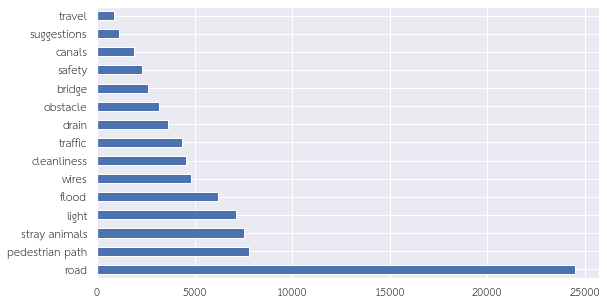

In [61]:
data_df['type'].value_counts().plot.barh()

More than a quarter of the problems reported are related to roads, so we are going to look into this type of problems a bit more by first considering which province mostly contributes to this number of reports.

In [62]:
data_df[data_df['type'] == 'road'].groupby('province')['province'].count() / len(data_df[data_df['type'] == 'road'])

province
กรุงเทพมหานคร    0.995879
ฉะเชิงเทรา       0.000041
ชลบุรี           0.000122
นครปฐม           0.000204
นครราชสีมา       0.000082
นนทบุรี          0.001346
ปทุมธานี         0.000449
ปราจีนบุรี       0.000041
มหาสารคาม        0.000041
สงขลา            0.000041
สมุทรปราการ      0.001510
สมุทรสาคร        0.000122
สุรินทร์         0.000041
อ่างทอง          0.000041
เชียงใหม่        0.000041
Name: province, dtype: float64

More than 99% of the reported road cases are from Bangkok. Even though this seems sensible since Bangkok is the most congested city in Thailand, it raises some doubt to how many cases are reported by each province.

### Province column

In [63]:
data_df['province'].nunique()

38

In [64]:
data_df.groupby('province')['province'].count().sort_values(ascending=False)

province
กรุงเทพมหานคร      82260
นนทบุรี              123
สมุทรปราการ           98
ปทุมธานี              43
นครปฐม                16
สมุทรสาคร              7
ชลบุรี                 6
ฉะเชิงเทรา             6
เชียงใหม่              5
นครราชสีมา             5
สุราษฎร์ธานี           4
จันทบุรี               3
พิจิตร                 2
อุดรธานี               2
สุรินทร์               2
นครนายก                2
สตูล                   1
เพชรบูรณ์              1
อุบลราชธานี            1
สุโขทัย                1
เชียงราย               1
สุพรรณบุรี             1
อ่างทอง                1
ยะลา                   1
สงขลา                  1
ศรีสะเกษ               1
ลำปาง                  1
ลพบุรี                 1
กาญจนบุรี              1
มหาสารคาม              1
ภูเก็ต                 1
พิษณุโลก               1
พระนครศรีอยุธยา        1
ปราจีนบุรี             1
นครศรีธรรมราช          1
ตาก                    1
ตราด                   1
แพร่                   1
Name: province, dtype: int64

In [65]:
data_df.groupby('province')['province'].count()['กรุงเทพมหานคร']/len(data_df)

0.9958114422681161

There are 38 provinces that have reported at least a case (which is about half of all the cities in Thailand). However, more than 99.5% of all the cases are reported from กรุงเทพมหานคร (Bangkok). Also, only 4 provinces report more than 10 cases. Based on this insight, we are going to focus solely on these 5 provinces in our analysis: กรุงเทพมหานคร (Bangkok), นนทบุรี (Nonthaburi), สมุทรปราการ (Samut Prakan), ปทุมธานี (Pathum Thani), and นครปฐม (Nakhon Pathom). If we look at a Thailand map, we will see that thse 5 provinces are adjacent to one another and are all in the central part of Thailand. Since Traffy Fondue platfrom has recently been advertised over Bangkok, this does not come as a surprise.

Now for these 5 provinces, we would like to explore the distribution of problem types for each of them.

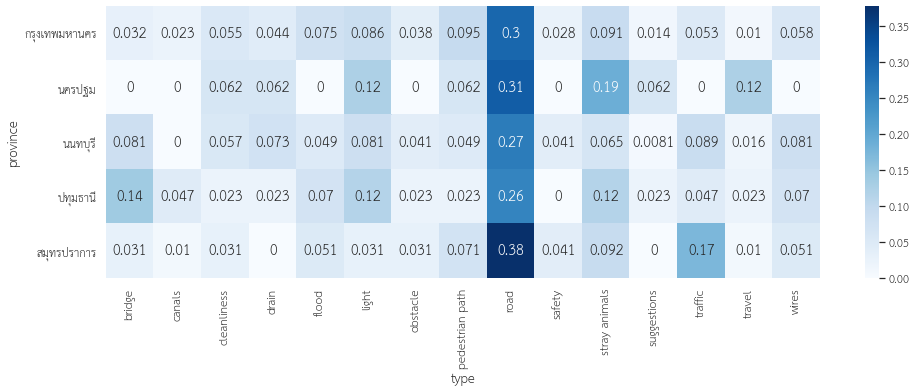

In [66]:
plt.figure(figsize = (16,5))

five_provinces = data_df[data_df['province'].isin(['กรุงเทพมหานคร', 'นนทบุรี', 'สมุทรปราการ', 'ปทุมธานี', 'นครปฐม'])]
sns.heatmap(pd.crosstab(five_provinces['province'], five_provinces['type'], normalize='index'), annot=True, cmap='Blues');

From the heatmap, the most dominant problem type of all these five provinces is "road". Two other common problem types are "stray animals" and "light". These three types of problems are shown in the top 5 problem types of all the dataset.

### District column

We are going to consider only districts of the five provinces with the most reported cases (i.e. กรุงเทพมหานคร (Bangkok), นนทบุรี (Nonthaburi), สมุทรปราการ (Samut Prakan), ปทุมธานี (Pathum Thani), and นครปฐม (Nakhon Pathom)).

Since Bangkok has the most reported cases, we are going to leave it until the end. Let's start easy with the other four provinces.

For each province, we are going to consider the distribution of problem types and states of reported cases.

#### นนทบุรี (Nonthaburi)

In [67]:
nonthaburi_df = data_df[data_df['province'] == 'นนทบุรี']

<AxesSubplot:>

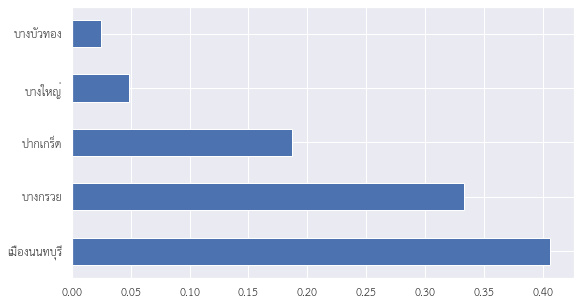

In [68]:
# Distribution of problem types
nonthaburi_df['district'].value_counts(normalize=True).plot.barh()

There are around 40% and 30% of reported cases from เมืองนนทบุรี (Mueang Nonthaburi) and บางกรวย (Bang Kruai) district, out of all the cases reported from Nonthaburi province. 

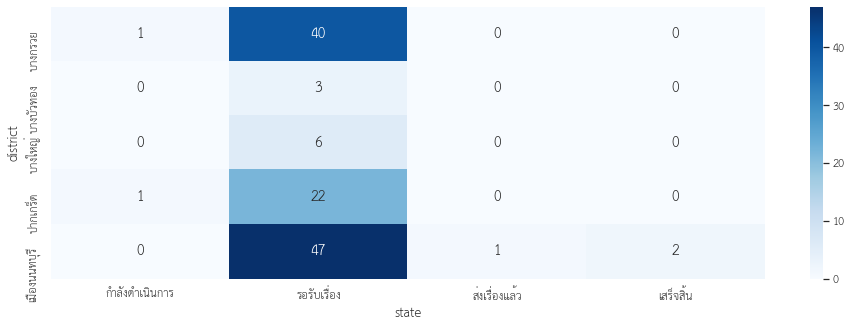

In [69]:
# Distribution of statuses of problems
plt.figure(figsize = (16,5))

sns.heatmap(pd.crosstab(nonthaburi_df['district'], nonthaburi_df['state']), annot=True, cmap='Blues');

The heatmap indicates that 118 out of 123 reported cases have not been received by their respective organisations yet. This either indicates the poor performance for this province, or either all these cases have been reported only recently. Let's take a closer look at their timestamps.

In [70]:
nonthaburi_df['timestamp'] # The first case is reported on February 2022

667      2022-08-11 21:09:20.789020+07:00
749      2022-08-11 19:49:22.862638+07:00
1425     2022-08-11 07:23:29.877531+07:00
1730     2022-08-10 18:58:01.302286+07:00
3777     2022-08-08 14:55:11.453592+07:00
                       ...               
115606   2022-05-31 06:28:19.233862+07:00
116375   2022-05-29 22:25:30.028835+07:00
116453   2022-05-29 21:16:38.947824+07:00
116793   2022-05-29 17:26:48.781487+07:00
117319   2022-02-23 19:35:09.184499+07:00
Name: timestamp, Length: 123, dtype: datetime64[ns, Asia/Bangkok]

<AxesSubplot:>

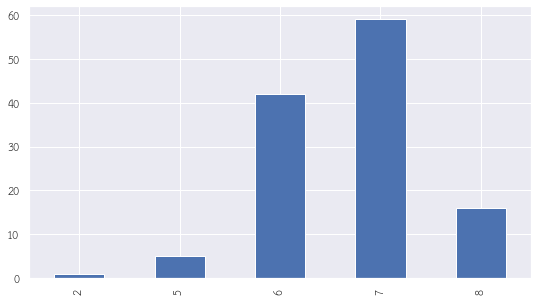

In [71]:
nonthaburi_df['timestamp'].dt.month.value_counts().sort_index().plot.bar()

Lots of cases were reported in June and July, which was quite a few weeks before mid-August (as of now). This implies that there are some delay for these cases to be sent to their respective organizations, and therefore further investigation is needed.

#### สมุทรปราการ (Samut Prakan)

In [72]:
samutprakan_df = data_df[data_df['province'] == 'สมุทรปราการ']

<AxesSubplot:>

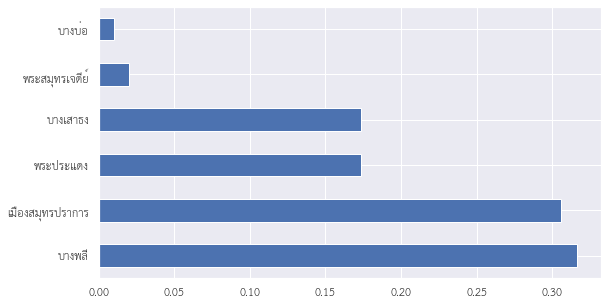

In [73]:
# Distribution of problem types
samutprakan_df['district'].value_counts(normalize=True).plot.barh()

30% of cases are reported equally from พระประแดง (Phra Pradaeng) and บางเสาธง (Bang Sao Thong) districts. Meanwhile, เมืองสมุทรปราการ (Mueang Samut Prakan) and บางพลี (Bang Plee) districts each have more than 30% of cases reported from there.

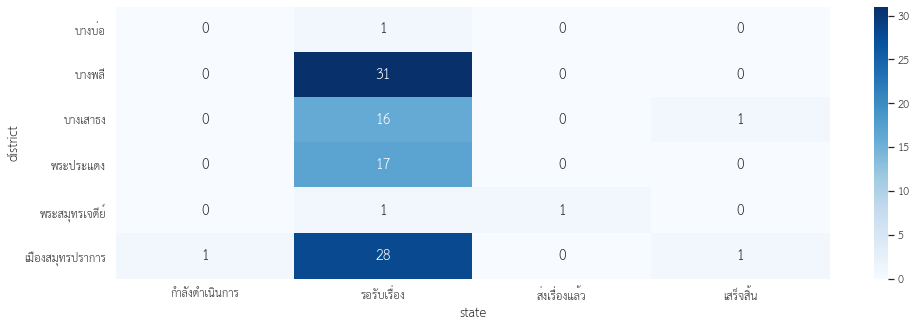

In [74]:
# Distribution of statuses of problems
plt.figure(figsize = (16,5))

sns.heatmap(pd.crosstab(samutprakan_df['district'], samutprakan_df['state']), annot=True, cmap='Blues');

In [75]:
samutprakan_df['timestamp'] # The second case was reported on 29th of May, 2022 

789      2022-08-11 19:03:48.337729+07:00
4117     2022-08-08 08:34:37.398818+07:00
4494     2022-08-07 17:20:53.433469+07:00
5494     2022-08-06 12:57:49.479329+07:00
6875     2022-08-05 08:45:10.037687+07:00
                       ...               
113596   2022-06-02 15:58:24.056961+07:00
116277   2022-05-30 06:23:54.649299+07:00
116309   2022-05-30 00:26:12.260030+07:00
116764   2022-05-29 17:49:13.562506+07:00
117691          2021-09-02 21:00:00+07:00
Name: timestamp, Length: 98, dtype: datetime64[ns, Asia/Bangkok]

<AxesSubplot:>

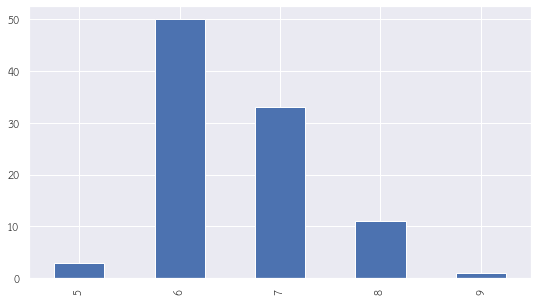

In [76]:
samutprakan_df['timestamp'].dt.month.value_counts().sort_index().plot.bar()

Similar to Nonthaburi province, there seems to be a delay in the process of notifying associated organisations of issues being reported in Traffy Fondue in Samut Prakan province.

Note that the case appearing at September was of 2021, which is an outlier.

#### ปทุมธานี (Pathum Thani)

In [77]:
pathumthani_df = data_df[data_df['province'] == 'ปทุมธานี']

<AxesSubplot:>

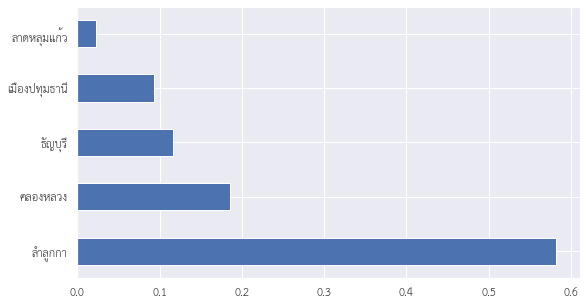

In [78]:
# Distribution of problem types
pathumthani_df['district'].value_counts(normalize=True).plot.barh()

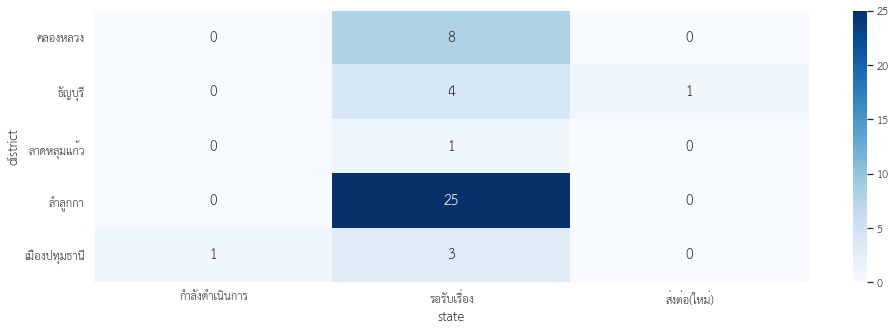

In [79]:
# Distribution of statuses of problems
plt.figure(figsize = (16,5))

sns.heatmap(pd.crosstab(pathumthani_df['district'], pathumthani_df['state']), annot=True, cmap='Blues');

In [80]:
pathumthani_df['timestamp'] # The first case was reported on 5th of June, 2022

1690     2022-08-10 19:24:56.890448+07:00
1870     2022-08-10 16:31:45.027606+07:00
5930     2022-08-06 00:23:32.945692+07:00
6045     2022-08-05 20:16:50.923280+07:00
11580    2022-08-01 12:39:57.359654+07:00
12059    2022-07-31 22:45:52.502867+07:00
12085    2022-07-31 21:46:41.827649+07:00
12108    2022-07-31 21:01:17.670848+07:00
15083    2022-07-28 08:56:44.935874+07:00
17439    2022-07-25 18:54:46.834226+07:00
18699    2022-07-24 13:14:05.500436+07:00
19997    2022-07-23 00:53:35.686785+07:00
19999    2022-07-23 00:49:37.326090+07:00
29855    2022-07-16 12:51:06.103860+07:00
31357    2022-07-14 22:20:07.595736+07:00
38658    2022-07-09 01:44:49.261405+07:00
39482    2022-07-08 13:21:13.621228+07:00
42021    2022-07-06 22:07:47.383865+07:00
42176    2022-07-06 20:22:26.624387+07:00
42180    2022-07-06 20:20:49.084358+07:00
42534    2022-07-06 17:07:51.047675+07:00
42863    2022-07-06 12:50:35.957690+07:00
43219    2022-07-06 08:48:07.310471+07:00
48518    2022-07-03 12:07:15.66743

<AxesSubplot:>

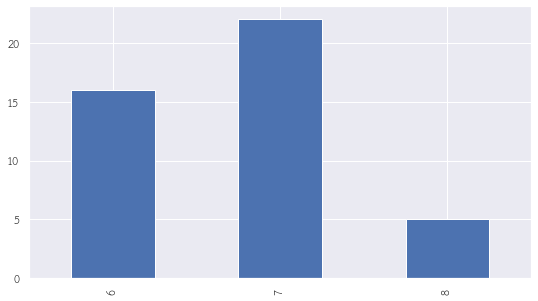

In [81]:
pathumthani_df['timestamp'].dt.month.value_counts().sort_index().plot.bar()

Similarly, there seems to be a delay in the process of notifying associated organisations of issues being reported in Traffy Fondue in Pathum Thani province.

#### นครปฐม (Nakhon Pathom)

In [82]:
nakhonpathom_df = data_df[data_df['province'] == 'นครปฐม']

<AxesSubplot:>

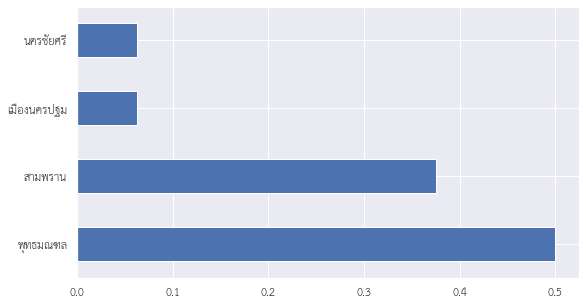

In [83]:
# Distribution of problem types
nakhonpathom_df['district'].value_counts(normalize=True).plot.barh()

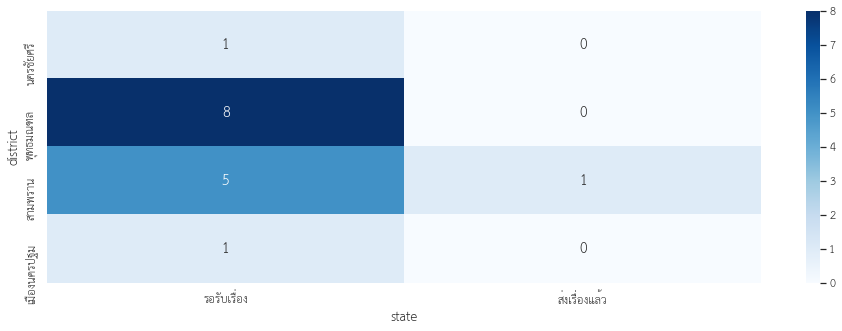

In [84]:
# Distribution of statuses of problems
plt.figure(figsize = (16,5))

sns.heatmap(pd.crosstab(nakhonpathom_df['district'], nakhonpathom_df['state']), annot=True, cmap='Blues');

In [85]:
nakhonpathom_df['timestamp'] # The second case was reported on 5th of June, 2022

1546     2022-08-10 22:18:05.868296+07:00
2452     2022-08-09 22:16:56.207070+07:00
17308    2022-07-25 21:00:45.102531+07:00
19461    2022-07-23 15:00:04.554935+07:00
29466    2022-07-16 19:12:47.781430+07:00
41437    2022-07-07 11:19:44.221016+07:00
48918    2022-07-03 08:42:57.900074+07:00
49067    2022-07-03 01:24:57.619639+07:00
55883    2022-06-29 16:33:47.218161+07:00
64308    2022-06-26 08:15:28.229283+07:00
77454    2022-06-20 20:28:35.161573+07:00
79163    2022-06-20 06:49:41.061812+07:00
85404    2022-06-16 22:34:06.150639+07:00
92016    2022-06-13 16:24:17.525345+07:00
93012    2022-06-12 21:35:13.092311+07:00
117952          2021-09-02 21:00:00+07:00
Name: timestamp, dtype: datetime64[ns, Asia/Bangkok]

<AxesSubplot:>

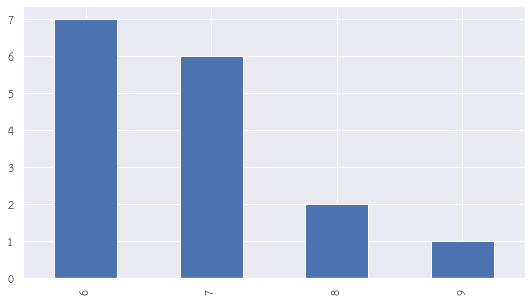

In [86]:
nakhonpathom_df['timestamp'].dt.month.value_counts().sort_index().plot.bar()

Similarly, there seems to be a delay in the process of notifying associated organisations of issues being reported in Traffy Fondue in Nakhon Pathom province.

Note that the first reported case was on September 2021, which was an outlier.

#### กรุงเทพมหานคร (Bangkok)

In [87]:
bangkok_df = data_df[data_df['province'] == 'กรุงเทพมหานคร']

In [88]:
len(bangkok_df)

82260

In [89]:
bangkok_df['district'].nunique()

50

<AxesSubplot:>

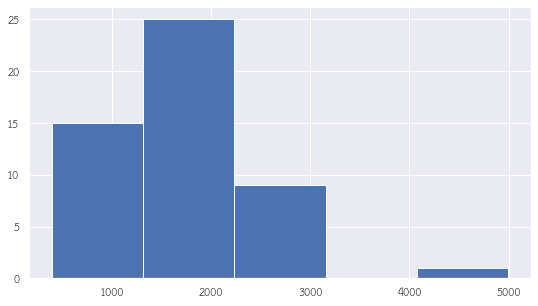

In [90]:
# Distribution of problem types
bangkok_df['district'].value_counts().hist(bins=5)

In [91]:
bangkok_df['district'].value_counts()

จตุจักร              4998
บางกะปิ              2942
ประเวศ               2749
สวนหลวง              2738
บางเขน               2553
ลาดกระบัง            2446
วัฒนา                2435
ห้วยขวาง             2355
คลองเตย              2355
บางแค                2260
ราชเทวี              2233
บางซื่อ              2032
ปทุมวัน              2002
ดินแดง               1998
บางขุนเทียน          1978
บางนา                1890
พญาไท                1883
สาทร                 1770
บางรัก               1667
วังทองหลาง           1658
คลองสามวา            1636
บางกอกน้อย           1636
ลาดพร้าว             1587
สายไหม               1518
บึงกุ่ม              1494
จอมทอง               1490
บางพลัด              1484
พระนคร               1475
มีนบุรี              1445
ดอนเมือง             1414
ยานนาวา              1414
พระโขนง              1328
สะพานสูง             1324
ธนบุรี               1317
ภาษีเจริญ            1315
หลักสี่              1300
ตลิ่งชัน             1250
หนองจอก              1081
คลองสาน     

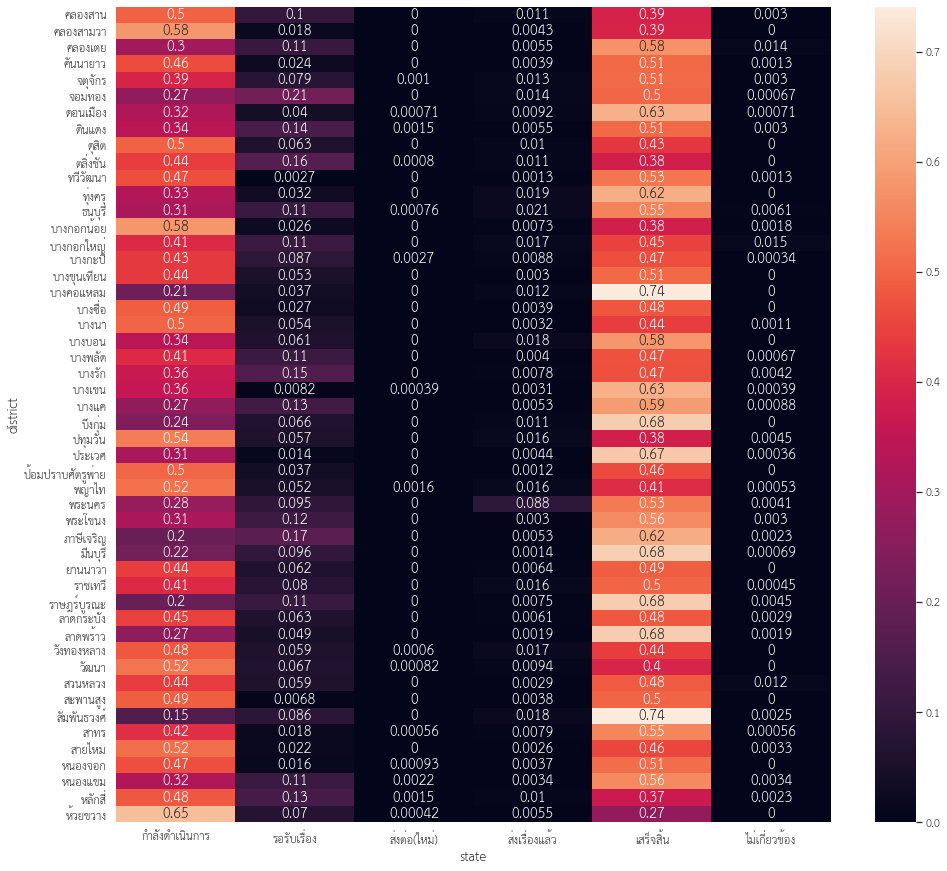

In [92]:
# Distribution of statuses of problems
plt.figure(figsize = (16,15))

sns.heatmap(pd.crosstab(bangkok_df['district'], bangkok_df['state'], normalize='index'), annot=True);

We can see that for each district in Bangkok, around 80% of the cases are either being in progress or resolved. This reflects a great performance of how issues are being addressed in Bangkok. However, there are still some districts whose cases are unnoticed including จอมทอง (Chom Thong) (21%), ตลิ่งชัน (Taling Chan) (16%), ภาษีเจริญ (Phasi Charoen) (17%), and บางรัก (Bang Rak) (15%). The performance of these districts needs more investigation.

### Comment column

This column contains the description for each problem. As a result, it may be helpful to analyse it using a word cloud.

We need two additional packages to create a Thai word cloud: **wordcloud** (to create a word cloud) and **pythainlp** (to work with Thai alphabets).

In [93]:
!pip install wordcloud
!pip install pythainlp

Now we import all the necessary modules from the packages we have just downloaded.

In [94]:
# from 'https://github.com/prasertcbs/word_cloud_thai/blob/main/word_cloud_thai.ipynb'
import pythainlp
from pythainlp import word_tokenize
from pythainlp.corpus import get_corpus # for getting stopwords

import wordcloud
from wordcloud import WordCloud

import re

#### Step 1: Split each comment into a list of words, then combine them together

In [95]:
words_list = [word_tokenize(s) for s in data_df['comment']] # Running this cell takes a while

#### Step 2: Combine the list into a string of words each of which is separated by a space

In [96]:
words = [word for words_list_elem in words_list for word in words_list_elem]
all_words = ' '.join(words).lower().strip()

In [97]:
all_words[:1200]

'น้ำท่วม ขัง   ถนน ชำรุด เกิด อุบัติเหตุ แบ ลิ เอ อร ์ ข้างทาง ที่ มี การ ซ่อม ท่อระบายน้ำ   ไม่ มี การถ่วง ทราย หรือ น้ำ ไว้   ทำให้ ลม พัด แบ ลิ เอ อร ์ มา ชน รถ ทำให้ เสียหลัก ล้ม   \n เบอร์ ติดต่อ \n 0623902332 \n 0623901441 มี ร้านกาแฟ มา เปิด ใน ซอย โสภณ   2   ( สุขุมวิท   68 )   แต่ ให้ ลูกค้า รถ จอด ริมถนน ใน ซอย ทำให้ รถ ไม่ สามารถ ขับ สวน กัน ได้ เนื่องจาก รถ ที่มา จอด ใช้ บริการ ปิดกั้น ถนน ไป เกือบ   1   เลน เต็มๆ ไฟ มืดหน้า ธนาคาร   อันตราย มาก ช่วง กลางคืน รถ จอด กีดขวาง การจราจร เป็นประจำ   ตรง บริเวณ หน้า โรงเจ   ใกล้ ทางโค้ง   รถ สวน กัน ไม่ ได้   เสี่ยง เกิด อุบัติเหตุ   ขอให้ ส่ง เจ้าหน้า ที่มา ตรวจ บ่อยๆ   และ ถ้า เป็นไปได้ รบกวน ติด ป้ายห้ามจอด ตลอดเวลา   ทุกวัน   ทุกเวลา ด้ว ครับ ไฟ ส่อง ถนน ดับ   ที่ แยก พระราม 4   เขต คลอง เตย   ทำให้ กลางคืน ถนน มืด   เสี่ยงอันตราย รถยนต์ และ คนเดินถนน เวลา กลางคืน ขอ รบกวน    3   ข้อ   1 . อยาก ให้ มา จัดเก็บ ขยะ   2 . ปรับ พื้นที่ ทำเป็น ฟุตบาท   และ   3 . จัดระเบียบ สายไฟฟ้า ให้ เรียบร้อย   เนื่องจาก ตรงนี้ ติด ถนน ลอด ใต้ ท

In [98]:
# These stopwords are ignored during the wordcloud creation if found in the string
stopwords = pythainlp.corpus.thai_stopwords()

#### Step 3: Create the word cloud

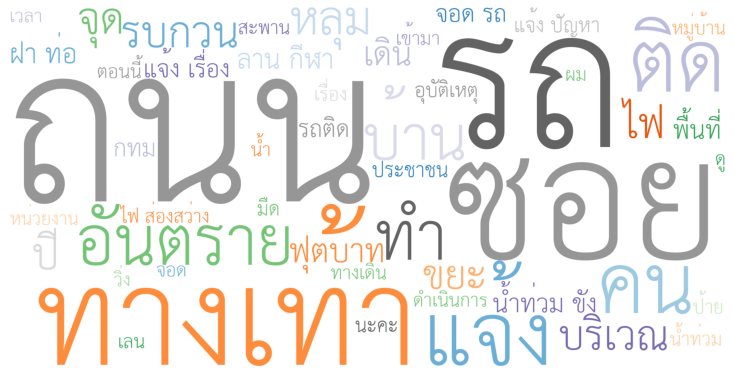

In [99]:
# from 'https://github.com/prasertcbs/word_cloud_thai/blob/main/word_cloud_thai.ipynb'
wordcloud = WordCloud(
    font_path = 'thsarabunnew-webfont.ttf',
    regexp='[ก-๙]+',
    stopwords=stopwords,
    width=2000, height=1000,
    prefer_horizontal=1,
    max_words=50,
    colormap='tab20c',
    background_color = 'white').generate(all_words)
plt.figure(figsize = (10, 9))
plt.imshow(wordcloud)
plt.axis('off')
plt.tight_layout(pad=0)

Most common words in the comments are ถนน (road), รถ (car), ซอย (alley) and ทางเท้า (pedestrian path). These words really affirms our finding that the road and the pedestrian path problems are two most common types of problems reported.

### Coords column

In this part, we are going to show the heatmap on Thailand map based on the coordinates provided in the dataset. To simplify the process, let's extract latitudes and longitudes out of coords column.

In [100]:
# a value in coords column is of the form 'longitude, latitude'
data_df['lat'] = data_df['coords'].str.split(',').str[1].astype(float)
data_df['lng'] = data_df['coords'].str.split(',').str[0].astype(float)

In [101]:
data_df.head(5)

,ticket_id,type,organization,comment,coords,photo,address,district,subdistrict,province,timestamp,state,lat,lng
1,2022-6QGB8R,flood,กรุงเทพมหานคร,น้ำท่วมขัง ถนนชำรุด,"100.49539,13.59977",https://storage.googleapis.com/traffy_public_b...,310/44 ซอย เกรียงศักดิ์ อนุสรณ์ แขวง ทุ่งครุ เ...,ทุ่งครุ,ทุ่งครุ,กรุงเทพมหานคร,2022-08-12 21:45:51.129286+07:00,รอรับเรื่อง,13.59977,100.49539
2,2022-KNHGB3,drain,กรุงเทพมหานคร,เกิดอุบัติเหตุแบลิเออร์ข้างทางที่มีการซ่อมท่อร...,"100.59597,13.72345",https://storage.googleapis.com/traffy_public_b...,440 ถ. สุขุมวิท 71 แขวง พระโขนงเหนือ เขตวัฒนา ...,วัฒนา,พระโขนงเหนือ,กรุงเทพมหานคร,2022-08-12 21:42:07.060547+07:00,รอรับเรื่อง,13.72345,100.59597
3,2022-6A732F,stray animals,กรุงเทพมหานคร,มีร้านกาแฟมาเปิดในซอยโสภณ 2 (สุขุมวิท 68) แต่ใ...,"100.60143,13.67807",https://storage.googleapis.com/traffy_public_b...,418 Sukhumvit 68 Alley แขวง บางนา เขตบางนา กรุ...,บางนา,บางนาเหนือ,กรุงเทพมหานคร,2022-08-12 21:41:31.519491+07:00,รอรับเรื่อง,13.67807,100.60143
4,2022-HEDYNT,light,กรุงเทพมหานคร,ไฟมืดหน้าธนาคาร อันตรายมากช่วงกลางคืน,"100.50122,13.63766",https://storage.googleapis.com/traffy_public_b...,820/60 ถ. ประชาอุทิศ แขวง ทุ่งครุ เขตทุ่งครุ ก...,ทุ่งครุ,ทุ่งครุ,กรุงเทพมหานคร,2022-08-12 21:40:51.838659+07:00,รอรับเรื่อง,13.63766,100.50122
6,2022-AUFB4R,stray animals,กรุงเทพมหานคร,รถจอดกีดขวางการจราจรเป็นประจำ ตรงบริเวณหน้าโรง...,"100.52076,13.70923",https://storage.googleapis.com/traffy_public_b...,100 ถนนจันทน์ แขวง ทุ่งวัดดอน เขต สาทร กรุงเทพ...,สาทร,ทุ่งวัดดอน,กรุงเทพมหานคร,2022-08-12 21:29:10.475158+07:00,รอรับเรื่อง,13.70923,100.52076


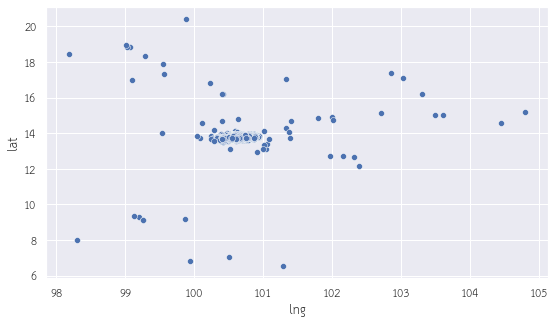

In [102]:
sns.scatterplot(x=data_df['lng'], y=data_df['lat']);

It would be nice if we can see how these points show on a map, especially in a form that can reflect the density of points at a particular area. In order to put all these points on a map, we need to install a module called **folium**.

In [103]:
!pip install folium

Then we can import the folium module and use it to create a heatmap on Thailand map.

In [104]:
# inspired from 'https://georgetsilva.github.io/posts/mapping-points-with-folium/' and 'https://www.kaggle.com/code/daveianhickey/how-to-folium-for-maps-heatmaps-time-data/notebook'

import folium
from folium.plugins import HeatMap

heat_map = folium.Map(location=[13.762087, 100.401537], zoom_start=6)
# data for folium to create a heatmap must be in the format [[lat, lng], [lat, lng], ...]
heat_data = [[lat, lng] for lat, lng in zip(data_df['lat'], data_df['lng'])]
HeatMap(heat_data).add_to(heat_map)

heat_map

From the heatmap, most reports were from the central part with a few from northern, northeastern, eastern and southern parts of Thailand.

### Timestamp column

We are going to observe the trend of reported cases over scales of months (e.g. Jan-Sep), days (e.g. 1-28), hours on weekdays, and hours on weekends.

To simplify the process, let's extract timestamp information into new columns.

In [105]:
data_df['day'] = data_df['timestamp'].dt.day
data_df['day_of_week'] = data_df['timestamp'].dt.dayofweek
data_df['hour'] = data_df['timestamp'].dt.hour
dayname_map = {0: 'Monday', 1: 'Tuesday', 2: 'Wednesday', 3: 'Thursday', 4: 'Friday', 5: 'Saturday', 6: 'Sunday'}
data_df['day_of_week_name'] = data_df['day_of_week'].map(dayname_map)

#### Month-in-year scale

timestamp
2021-09      471
2021-11        3
2021-12      122
2022-01      103
2022-02       95
2022-03       60
2022-04        8
2022-05     1411
2022-06    42447
2022-07    29444
2022-08     8442
Freq: M, dtype: int64


C:\Users\HP\anaconda3\lib\site-packages\pandas\core\arrays\datetimes.py:1101: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  warnings.warn(


<AxesSubplot:xlabel='timestamp'>

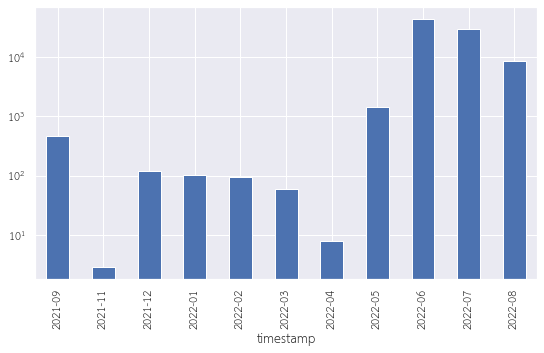

In [106]:
per_month_series = data_df.groupby(data_df['timestamp'].dt.to_period('M')).size()
print(per_month_series)
per_month_series.plot(kind='bar', logy = True)

#### Day-in-month scale

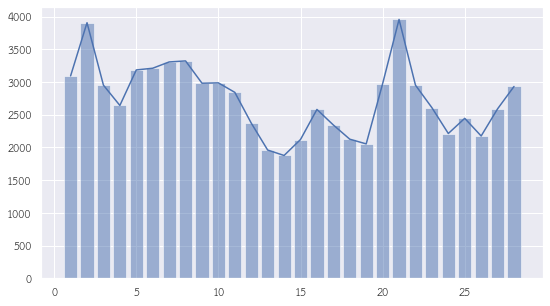

In [107]:
# only up to 28th of each month since each month has different number of days 
day_in_month_df = data_df[(data_df['day'] <= 28)].groupby('day').size()
plt.plot(day_in_month_df.index, day_in_month_df.values);
plt.bar(day_in_month_df.index, day_in_month_df.values, alpha=0.5);

There seems to be an increase in the number of reported cases at the first (day 1-5) of the third (day 20-23) weeks of each month, followed by the decline.

Most months seem to follow this trend.

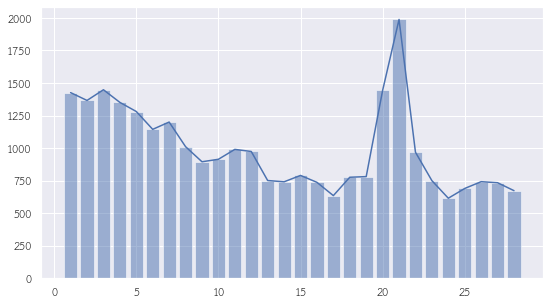

In [108]:
# only up to 28th of each month since each month has different number of days 
july_df = data_df[(data_df['day'] <= 28) & (data_df['timestamp'].dt.month == 7)].groupby('day').size()
plt.plot(july_df.index, july_df.values);
plt.bar(july_df.index, july_df.values, alpha=0.5);

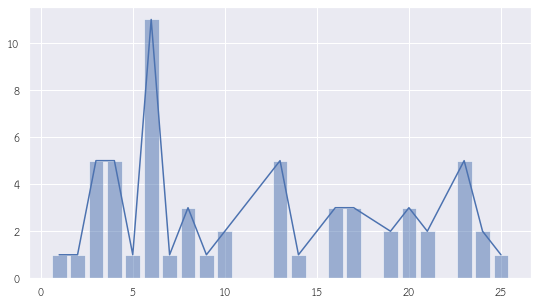

In [109]:
# only up to 28th of each month since each month has different number of days 
march_df = data_df[(data_df['day'] <= 28) & (data_df['timestamp'].dt.month == 3)].groupby('day').size()
plt.plot(march_df.index, march_df.values);
plt.bar(march_df.index, march_df.values, alpha=0.5);

#### Hours in weekday scale

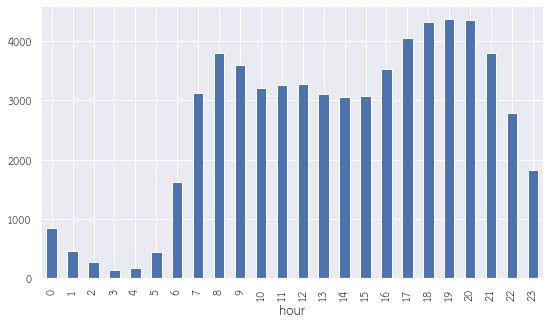

In [110]:
data_df[data_df['day_of_week'] <= 4].groupby('hour').size().plot(kind='bar');

On weekdays, people mostly report cases during morning (7-9 am local time) and evening until early night (4-9 pm local time). They report more cases during later peak than former peak.

#### Hours in weekend scale

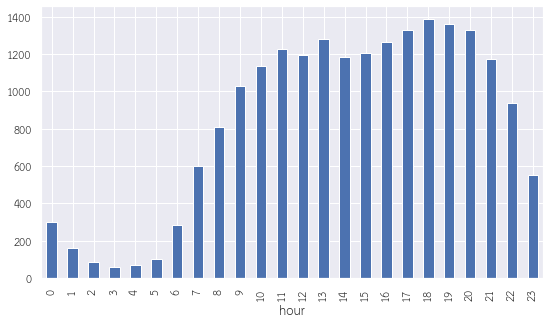

In [111]:
data_df[data_df['day_of_week'] > 4].groupby('hour').size().plot(kind='bar');

On weekends, people mostly report cases during lunch (11 am - 1 pm local time) and during evening until early night (4-9 pm local time). They report more cases during later peak than former peak.

### State column

Since we have already explored the distribution of problem statuses in the five provinces with the most number of reported cases, we are going to inspect the distribution at the country level in this part.

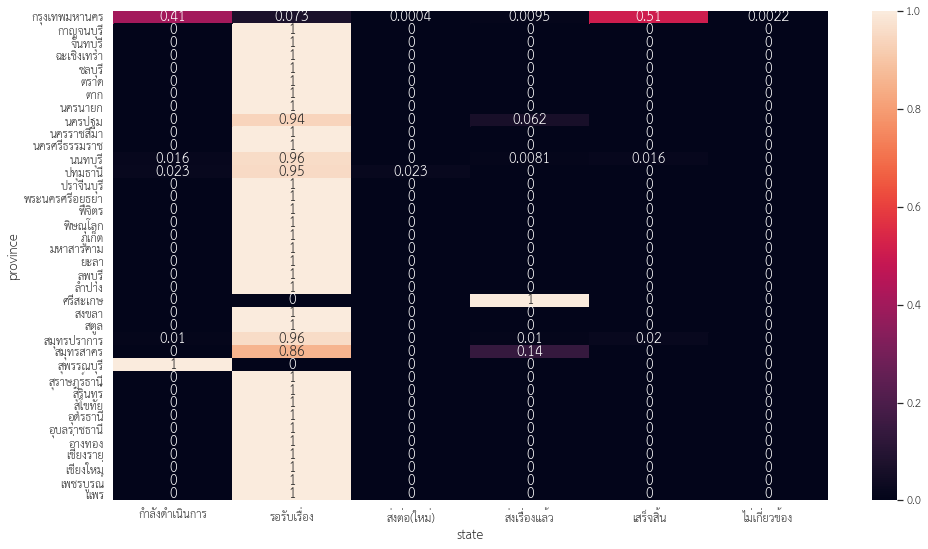

In [112]:
plt.figure(figsize = (16,9))

sns.heatmap(pd.crosstab(data_df['province'], data_df['state'], normalize='index'), annot=True);

It becomes clear from this heatmap that the problem status trend is not restricted only to Nonthaburi, Samut Prakan, and Pathum Thani. Most provinces have not known about reported cases in their area, and apart from Bangkok that resolves half of its reported cases, no any province resolves more than 2 percent of their problems. 

## Asking and Answering Questions

Now that we have finished exploring the dataset, we have come up with several interesting questions. In this section, we are going to answer them using analysis tools like numpy and pandas, or by visualisation tools like matplotlib and seaborn.



#### Q1: What are 6 most frequent types of problem reported? Does this change in different provinces?

To answer the former part of this question, we simply get the 6 topmost values from value_counts() function applied on the type column of the dataframe. Then, to answer the latter part of the question, we use the heatmap from seaborn to get the answer.

In [113]:
data_df['type'].value_counts()[:6] # value_counts() to get the number of distinct values in the column, and pick the topmost 6 values

road               24511
pedestrian path     7802
stray animals       7541
light               7130
flood               6219
wires               4805
Name: type, dtype: int64

The six topmost types of problem are road, pedestrian path, stray animals, light, flood, and wires.

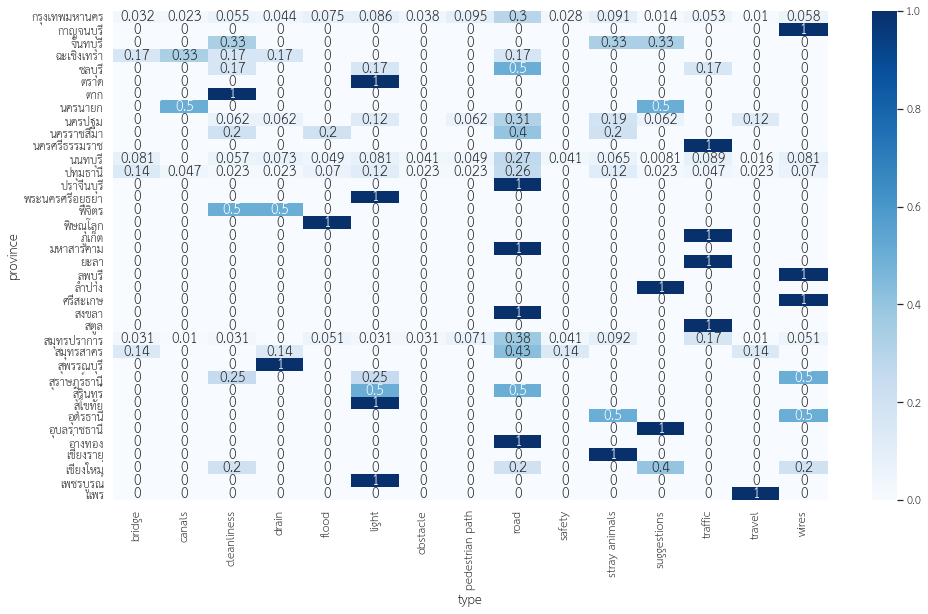

In [114]:
plt.figure(figsize = (16,9))

# we produce the data in a cross table using pd.crosstab, then show it in heatmap using sns.heatmap
sns.heatmap(pd.crosstab(data_df['province'], data_df['type'], normalize='index'), annot=True, cmap='Blues'); 

From the heatmap, there seems to be a difference in how problem types are distributed over different provinces, but the 5 provinces with highest number of reported cases (กรุงเทพมหานคร (Bangkok), นนทบุรี (Nonthaburi), สมุทรปราการ (Samut Prakan), ปทุมธานี (Pathum Thani), and นครปฐม (Nakhon Pathom)) have almost the same types of major problems.

#### Q2: What are the 5 provinces with the largest number of reports? How about per capita?

To answer the former part, we first group the data by province, then sort with the size of each group and get the top 5 provinces.

In [115]:
data_df.groupby('province').size().sort_values(ascending=False)[:5]

province
กรุงเทพมหานคร    82260
นนทบุรี            123
สมุทรปราการ         98
ปทุมธานี            43
นครปฐม              16
dtype: int64

The 5 provinces with highest number of reported cases are กรุงเทพมหานคร (Bangkok), นนทบุรี (Nonthaburi), สมุทรปราการ (Samut Prakan), ปทุมธานี (Pathum Thani), and นครปฐม (Nakhon Pathom).

For the latter part, we need to have information about the population size of each province. Since the current dataset does not have that information, we need to fetch that information from another place. The data we will use is the Thailand population number per province by the end of 2021 published by **Official statistics registration systems** (https://stat.bora.dopa.go.th/new_stat/webPage/statByYear.php).

In [116]:
url = 'https://stat.bora.dopa.go.th/new_stat/file/64/stat_c64.txt'
population_df = pd.read_csv(url, header=None, sep='|', thousands=',')
population_df

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,6412,0,ทั่วประเทศ,0,,0,,0,,32339118,33832321,66171439,27708635,NaN
1,6412,10,กรุงเทพมหานคร,0,,0,,0,,2592292,2935702,5527994,3147231,NaN
2,6412,11,จังหวัดสมุทรปราการ,0,,0,,0,,645884,710565,1356449,733185,NaN
3,6412,12,จังหวัดนนทบุรี,0,,0,,0,,599167,689470,1288637,728953,NaN
4,6412,13,จังหวัดปทุมธานี,0,,0,,0,,563851,626209,1190060,660020,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
73,6412,92,จังหวัดตรัง,0,,0,,0,,312693,327095,639788,237935,NaN
74,6412,93,จังหวัดพัทลุง,0,,0,,0,,254425,268116,522541,199687,NaN
75,6412,94,จังหวัดปัตตานี,0,,0,,0,,360348,369233,729581,199103,NaN
76,6412,95,จังหวัดยะลา,0,,0,,0,,269907,272407,542314,173226,NaN


We only need the third (province name) and the twelfth (population number) columns.

In [117]:
population_df = population_df[[2, 11]]
population_df

,2,11
0,ทั่วประเทศ,66171439
1,กรุงเทพมหานคร,5527994
2,จังหวัดสมุทรปราการ,1356449
3,จังหวัดนนทบุรี,1288637
4,จังหวัดปทุมธานี,1190060
...,...,...
73,จังหวัดตรัง,639788
74,จังหวัดพัทลุง,522541
75,จังหวัดปัตตานี,729581
76,จังหวัดยะลา,542314


In [118]:
population_df = population_df.rename(columns={2: "province", 11: "number"}) # rename the column names
population_df['province'] = population_df['province'].str.replace('จังหวัด', '') # remove the prefix for each province
population_df['province'] = population_df['province'].str.strip() # remove spaces before and after province names

population_df

,province,number
0,ทั่วประเทศ,66171439
1,กรุงเทพมหานคร,5527994
2,สมุทรปราการ,1356449
3,นนทบุรี,1288637
4,ปทุมธานี,1190060
...,...,...
73,ตรัง,639788
74,พัทลุง,522541
75,ปัตตานี,729581
76,ยะลา,542314


Now that we have the population size for each province, we are going to get the number of cases reported per province using groupby function in Pandas.

In [119]:
cases_per_province_df = data_df.groupby('province').size().to_frame() # count number of cases per province
cases_per_province_df = cases_per_province_df.rename(columns={0: "cases"}) # change column name
cases_per_province_df = cases_per_province_df.reset_index() # put province as column
cases_per_province_df

,province,cases
0,กรุงเทพมหานคร,82260
1,กาญจนบุรี,1
2,จันทบุรี,3
3,ฉะเชิงเทรา,6
4,ชลบุรี,6
5,ตราด,1
6,ตาก,1
7,นครนายก,2
8,นครปฐม,16
9,นครราชสีมา,5


In [120]:
# Merge two dataframes by province
cases_and_population_df = pd.merge(cases_per_province_df, population_df, how='left', on='province')
cases_and_population_df

,province,cases,number
0,กรุงเทพมหานคร,82260,5527994
1,กาญจนบุรี,1,894054
2,จันทบุรี,3,536557
3,ฉะเชิงเทรา,6,724178
4,ชลบุรี,6,1583672
5,ตราด,1,228376
6,ตาก,1,676583
7,นครนายก,2,260433
8,นครปฐม,16,922171
9,นครราชสีมา,5,2634154


The last step is to get the cases per capita, which is simply to divide the cases column with the number column, sort the result, and return the five topmost values. Since the number is likely to be small, we will consider per million population instead.

In [121]:
cases_and_population_df['case_per_million_population'] = (cases_and_population_df['cases']/cases_and_population_df['number']) * 1e6
cases_and_population_df.sort_values(by='case_per_million_population', ascending=False)[:5]

,province,cases,number,case_per_million_population
0,กรุงเทพมหานคร,82260,5527994,14880.623966
11,นนทบุรี,123,1288637,95.449688
25,สมุทรปราการ,98,1356449,72.247464
12,ปทุมธานี,43,1190060,36.132632
8,นครปฐม,16,922171,17.350361


Surprisingly, the top 5 provinces with the number of cases per capita is exactly in the same order as those without considering population numbers.

#### Q3: Which district has the most problems in Bangkok, and what kind of problems are they?

We firstly filter the dataframe to include only data from Bangkok, then we group the data by district to find the district with the most problems.

In [ ]:
bangkok_df = data_df[data_df['province'] == 'กรุงเทพมหานคร'] # filter bangkok province

In [126]:
bangkok_df.groupby('district').size().sort_values(ascending=False)[:1]

district
จตุจักร    4998
dtype: int64

The district with most problems in Bangkok is จตุจักร (Chatuchak). Now by filtering the district and use a value_counts function, we can get the number of each problem type.

In [127]:
bangkok_df[bangkok_df['district'] == 'จตุจักร']['type'].value_counts()

road               1328
pedestrian path     621
stray animals       495
light               482
wires               372
traffic             290
flood               226
obstacle            222
drain               217
cleanliness         198
safety              185
bridge              128
travel               90
suggestions          80
canals               64
Name: type, dtype: int64

So Chatuchak district has been reported of problems with road the most, followed by pedestrian path, stray animals, and light.

#### Q4: What are 6 most frequent types of problem for the last 3 months? Does this change for different provinces?

Currently we are in mid-August, so let's consider from June until August 2022.

In [130]:
# Add month column for convenience
data_df['month'] = data_df['timestamp'].dt.month

In [153]:
# create a dataframe only from May to August 2022
june_to_aug_df = data_df[(data_df['month'] >= 6) & (data_df['month'] <= 8)] # the earliest month was September 2021, so we only need to check the month

In [154]:
len(june_to_aug_df) * 100 / len(data_df) # Around 97% of cases are reported over the past 3 months.

97.24838389463235

In [155]:
june_to_aug_df['type'].value_counts()[:6]

road               23857
pedestrian path     7491
stray animals       7339
light               6983
flood               6088
wires               4727
Name: type, dtype: int64

Hence, the six most frequently reported problems are about road, pedestrian path, stray animals, light, food and wires.

To check for different provinces, we can simply create a heatmap similar to Q1, except now we use may_to_aug dataframe instead of the whole dataframe.

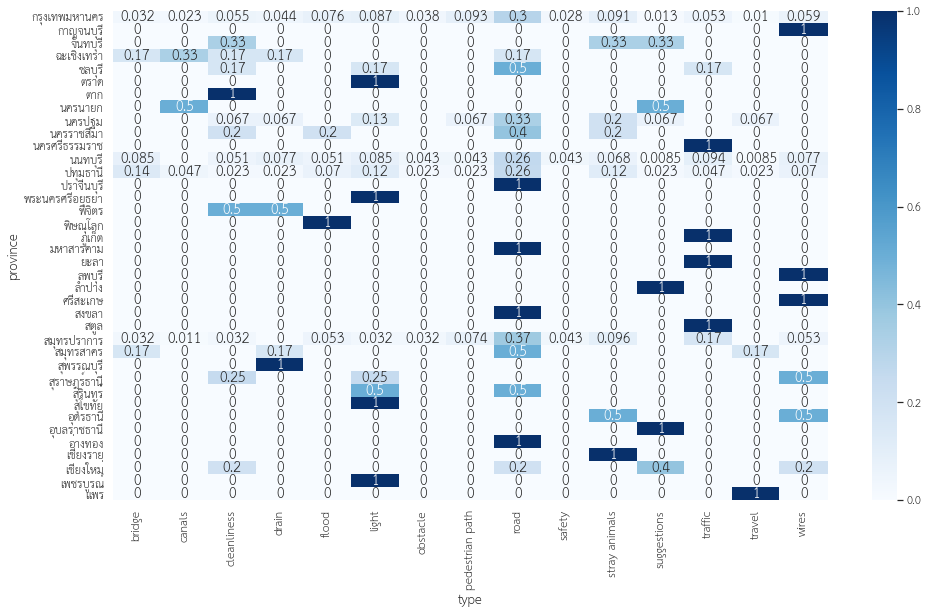

In [156]:
plt.figure(figsize = (16,9))

# we produce the data in a cross table using pd.crosstab, then show it in heatmap using sns.heatmap
sns.heatmap(pd.crosstab(june_to_aug_df['province'], june_to_aug_df['type'], normalize='index'), annot=True, cmap='Blues'); 

The distribution of problem types differ between districts as shown above (but quite similar for 5 provinces with the most reported number of cases).

#### Q5: What types of problems are mostly reported over the peak reporting time in a day? Does this trend change for weekday and weekend?

From our timestamp analysis, the peak hours of weekdays are between 7 am and 9 am local time, and from 4 pm to 9 pm local time.
Meanwhile, the peak hours of weekends are between 11 am and 1 pm, and from 4 pm to 9 pm.

In [143]:
weekdays_df = data_df[data_df['day_of_week'] <= 4] # data from weekdays
weekends_df = data_df[data_df['day_of_week'] > 4] # data from weekends

##### First peak: morning on weekdays

In [144]:
weekdays_df[(weekdays_df['hour'] >= 7) & (weekdays_df['hour'] <= 9)]['type'].value_counts()[:5]

road               3303
pedestrian path    1042
stray animals       937
traffic             867
flood               799
Name: type, dtype: int64

##### Second peak: evening til night on weekdays

In [145]:
weekdays_df[(weekdays_df['hour'] >= 16) & (weekdays_df['hour'] <= 21)]['type'].value_counts()[:5]

road               6837
light              2749
pedestrian path    2379
flood              2077
stray animals      2022
Name: type, dtype: int64

##### Third peak: lunch on weekends

In [146]:
weekends_df[(weekends_df['hour'] >= 11) & (weekends_df['hour'] <= 13)]['type'].value_counts()[:5]

road               1114
pedestrian path     363
stray animals       352
wires               276
cleanliness         213
Name: type, dtype: int64

##### Fourth peak: evening til night on weekends

In [147]:
weekends_df[(weekends_df['hour'] >= 16) & (weekends_df['hour'] <= 21)]['type'].value_counts()[:5]

road               2350
light               944
stray animals       714
pedestrian path     687
cleanliness         465
Name: type, dtype: int64

From these four peaks, we can conclude that during early peak hours there are more reported problems about road and pedestrian path, while the main reported problem types in evening peak are road and light. This holds regardless of weekdays or weekends.

#### Q6: Are there any particular problem types which are mostly sent to incorrect organizations?

In [148]:
# 'ไม่เกี่ยวข้อง' means 'not accountable for this issue'
data_df[data_df['state'] == 'ไม่เกี่ยวข้อง']['province'].value_counts()

กรุงเทพมหานคร    181
Name: province, dtype: int64

The above cell indicates that problems reported to incorrect organisation only occur in Bangkok. Therefore, we can work on bangkok_df instead of the whole data_df. To solve this question, we filter the data whose state is 'ไม่เกี่ยวข้อง', then call a value_counts function on type column.

In [149]:
bangkok_df[bangkok_df['state'] == 'ไม่เกี่ยวข้อง']['type'].value_counts()

road               55
traffic            26
stray animals      22
light              13
pedestrian path    12
bridge              8
wires               7
drain               7
flood               6
obstacle            5
safety              5
travel              5
cleanliness         5
suggestions         3
canals              2
Name: type, dtype: int64

Road problems are mostly sent to incorrect organisations, followed by traffic and stray animals.

## Inferences and Conclusion

We have found that most problems being reported are about roads, and this is ubiquitous across the country. There are also problems with lights and pedestrian paths. The former is mostly reported during evening, while the latter is during morning (on weekdays) or lunch (on weekends). Both the former and the latter are along with road problems. This may be due to the fact that these hours are when people travel to or return from work, so people have more problems with light at the evening until night than around noon.

Another insight we have found is that even though the first date this data was collected was back in September 2021, more than 97% of the cases have only been reported in the last 3 months (June to August). Most data was also reported from Bangkok and provinces adjacent to Bangkok. This is perhaps because Mr.Chadchart Sittipunt, the Governor of Bangkok, recommended this platform for Bangkok people back in late May. This conclusion is supported by the fact that number of cases have been in a decline after June.

Last but not least, one concerning insight is other than Bangkok, almost no provinces have ever resolved the problems reported to them, and most of them have not even been notified about those problems. This indicates that further investigation is needed regarding how informed non-Bangkok provinces are on Traffy Fondue platform.

Insights:
- More than 25% of the reported problems are related to roads, 99.5% of which are from Bangkok.
- More than 99.5% of all the cases are reported from Bangkok.
- About half of all the cities in Thailand have at least one reported case, only 5 of which have reported more than 10 cases, all of which are adjacent to Bangkok, including Bangkok itself.
- Road problems are the most dominant problem uniformly across the country.
- Nonthaburi, Samut Prakan, and Pathum Thani provinces have more than 95% unnoticed reported cases. (requires further investigation).
- More than 80% of cases in all of the districts in Bangkok except จอมทอง (Chom Thong) are either being investigated or resolved.
- Road, car, alley and pedestrian path are the most common words in the comments.
- Most reports were from the central part with a few from northern, northeastern, eastern and southern parts of Thailand.
- Most cases were reported in June 2022, which was right after Mr.Chadchart Sittipunt, the Governor of Bangkok, recommended this platform for Bangkok people. However, the trend starts declining as time goes by.
- There seems to be an increase in the number of reported cases at the first (day 1-5) of the third (day 20-23) weeks of each month, followed by the decline.
- Most cases have only been reported over the past three months.
- People mostly report cases during morning on weekdays and during lunch on weekends, and in the evening until early night on both weekdays and weekends. They report more cases during evening.
- People report fewer cases during night hours compared to day hours.
- People report more on road and pedestrian path in early peak hours, while more on road and light in the evening.
- At country level, apart from Bangkok, all provinces have almost not known about their reported problems at all, and have resolved no more than 2 percent of their problems.
- Five provinces which have been reported the most cases have almost the same distribution of problem types.

## References and Future Work

##### Ideas for improvement
- ranking system needs more consideration and is currently not flawless.
- more focus on Bangkok instead of the whole country, considering that most problems so far are from there
- research further into specific road problems

##### Ideas for future projects
- dynamic web application displaying different information regarding reported cases on Traffy Fondue
- data should be re-analysed over time

##### Useful resources
- **Traffy Fondue** *(for further background about Traffy Fondue)*:<br> https://www.traffy.in.th/.
- **Thai Sarabun Font** *(for using Thai font in matplotlib and seaborn)*:<br>  https://github.com/Phonbopit/sarabun-webfont/raw/master/fonts/thsarabunnew-webfont.ttf
- **Build an Exploratory Data Analysis Project from Scratch with Python, Numpy, and Pandas** *(for guidance on data analytics project)*:<br> https://www.youtube.com/watch?v=kLDTbavcmd0&list=PLyMom0n-MBrqbY6jbSJfk0wayU7AW6McE
- **Data Analysis with Python: Zero to Pandas** *(for basics in analytics tools)*:<br> https://jovian.ai/learn/data-analysis-with-python-zero-to-pandas
- **2022 Python for Machine Learning & Data Science Masterclass** *(to refer to more functions in analytics tools)*:<br> https://www.udemy.com/course/python-for-machine-learning-data-science-masterclass/
- **วิเคราะห์ข้อมูลปัญหาภายในกรุงเทพแบบชัชชัช (Traffy)** *(for guidance on analysis of Traffy Fondue data)*:<br> https://medium.com/@splendid_lapis_salmon_75/วิเคราะห์ข้อมูลปัญหาภายในกรุงเทพแบบชัชชัช-traffy-f7e82b09ffa2
- **Traffy x TeamChadChart** *(for Traffy Fondue data)*:<br> https://share.traffy.in.th/teamchadchart
- **สร้าง Word Cloud ด้วย Python** *(for Thai word cloud)*:<br> https://github.com/prasertcbs/word_cloud_thai
- **Mapping Points with Folium** *(for folium tutorial)*:<br> https://georgetsilva.github.io/posts/mapping-points-with-folium/
- **How to: Folium for maps, heatmaps & time data** *(for creating heatmap on Thailand map)*:<br> https://www.kaggle.com/code/daveianhickey/how-to-folium-for-maps-heatmaps-time-data/notebook
- **Population per province in Thailand** *(for population number per province of Thailand)*:<br> https://stat.bora.dopa.go.th/new_stat/webPage/statByYear.php
- **Stack Overflow**: *(for everything we do not know how to do)*:<br> https://stackoverflow.com/

and also official documentation for analytics tools
- **numpy**: https://numpy.org/doc/stable/
- **pandas**: https://pandas.pydata.org/docs/
- **matplotlib**: https://matplotlib.org/stable/api/index
- **seaborn**: https://seaborn.pydata.org/index.html


Let's commit our work to Jovian and submit it.

In [1]:
project_name = "traffy-fondue-data-analysis" # change this (use lowercase letters and hyphens only)

In [2]:
!pip install jovian --upgrade -q

In [3]:
import jovian

In [4]:
jovian.commit(project=project_name)

<IPython.core.display.Javascript object>

[jovian] Updating notebook "purin-suk/traffy-fondue-data-analysis" on https://jovian.ai/
[jovian] Committed successfully! https://jovian.ai/purin-suk/traffy-fondue-data-analysis


'https://jovian.ai/purin-suk/traffy-fondue-data-analysis'